# import libraries

In [2]:
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
from cartopy.util import add_cyclic_point
import sys
from global_land_mask import globe
import matplotlib.patches as mpatches
import matplotlib.colors as mcolors
import pandas as pd
import utils_v1v2 as v1v2
from matplotlib.patches import ConnectionPatch

import matplotlib as mpl
mpl.rcParams['font.size'] = 14
mpl.rcParams['xtick.labelsize'] = 15
mpl.rcParams['ytick.labelsize'] = 15
mpl.rcParams['axes.labelsize'] = 15
mpl.rcParams["legend.handlelength"] = 1.0
mpl.rcParams["legend.frameon"] = True

workdir = '/home/qin4/From_Compy/home_dir/'
datadir0 = '/p/user_pub/climate_work/qin4/From_Compy/compyfs_dir/'
figdir = workdir+'/scripts/published/figure/'

# fixed parameters 
dt = 1800 # time step unit: s
cpair = 1.00464e3 #J/(kg K)
rho_w = 1000 # kg/m3
gravit = 9.8 # m/s2

from datetime import date
today = date.today()
dd = today.strftime("%Y-%m-%d")
print(dd)

2023-10-02


# read omega700_mm

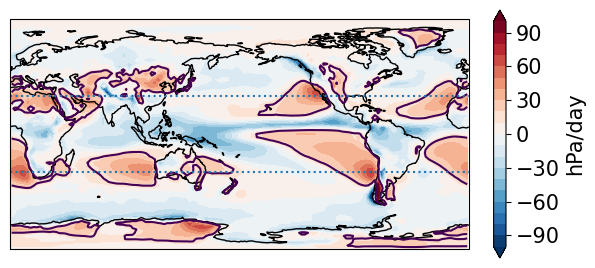

In [3]:

ff = xr.open_dataset('omega700_mm.nc')
omega700_pi_mm  = ff['omega700_pi_mm']
omega700_ab_mm  = ff['omega700_ab_mm']
omega700_avg_mm = ff['omega700_avg_mm']
ff.close()

# =========== check spatial map 
fig = plt.figure()
ax = fig.add_subplot(1,1,1,projection=ccrs.PlateCarree(180.))

datap = omega700_pi_mm

im = ax.contourf(datap.lon,datap.lat,datap,transform=ccrs.PlateCarree(),
                cmap='RdBu_r',
                levels=np.arange(-100,110,10),
                extend='both')

ax.contour(datap.lon,datap.lat,datap,transform=ccrs.PlateCarree(),
           levels=[15])
ax.coastlines()
ax.set_global()

fig.colorbar(im,fraction=0.025,label='hPa/day')

ax.axhline(y=30,ls=':')
ax.axhline(y=-30,ls=':')

# define cases

In [4]:
case_stamp = [
    'v2.OutTend',
    'v2.bk.MG',
    'v2.bk.MG_Berg',
    'v2.bk.MG_mincdnc',
    'v2.bk.MG_accre',
    'v2.bk.MG_auto',
    'v2.bk.MG_wsub',   
    ]

case_stamp_out = [
    'v2',
    'v2.v1(MG)',
    'v2.v1(MG_WBF)',
    'v2.v1(MG_mincdnc)',
    'v2.v1(MG_accre)',
    'v2.v1(MG_auto)',
    'v2.v1(MG_wsub)',
    
    ]
    
# colorsh = v1v2.get_color('tab10',len(case_stamp_out))
tab20c = v1v2.get_color('tab20',20)

v2c = tab20c[0] 
MGc = tab20c[2]
MG_Bergc = tab20c[9]
MG_mincdncc = tab20c[11]
MG_accrec = tab20c[13]
MG_autoc = tab20c[15]
MG_wsubc = tab20c[17]
v1c = 'tab:grey'

colorsh = [
    v2c,
    MGc,
    MG_Bergc,
    MG_mincdncc,
    MG_accrec,
    MG_autoc,
    MG_wsubc,
    v1c,
]

tag = 'v2.vs.MG'

focus_region = 'MarineLow' # MarineLow, MidLat

# defined regions 
latS = -30
latE = -60
lonS = 0
lonE = 360 

do_spc_region = False

if do_spc_region:
    tag3 = 'SelectedDomain'
else:
    tag3 = 'AllRegime'
    
# new norm for colorbar
norm=v1v2.StretchOutNormalize(vmin=-3, vmax=3, low=-0.2, up=0.2)


lats_spc = np.arange(-90,92.5,2.5)
lons_spc = np.arange(1.25,360,2.5)

# Figure 8 - cloud profile

/home/qin4/From_Compy/home_dir/diag_feedback_E3SM/data/global_CLOUD_v2.OutTend.nc
Hello TropMarineLow
Hello TropMarineLow
Hello TropMarineLow
/home/qin4/From_Compy/home_dir/diag_feedback_E3SM/data/global_CLOUD_v2.bk.MG.nc
Hello TropMarineLow
Hello TropMarineLow
Hello TropMarineLow
/home/qin4/From_Compy/home_dir/diag_feedback_E3SM/data/global_CLOUD_v2.bk.MG_mincdnc.nc
Hello TropMarineLow
Hello TropMarineLow
Hello TropMarineLow
/home/qin4/From_Compy/home_dir/diag_feedback_E3SM/data/global_CLOUD_v2.bk.MG_auto.nc
Hello TropMarineLow
Hello TropMarineLow
Hello TropMarineLow
/home/qin4/From_Compy/home_dir/diag_feedback_E3SM/data/global_CLOUD_v1.nc
Hello TropMarineLow
Hello TropMarineLow
Hello TropMarineLow
/home/qin4/From_Compy/home_dir/diag_feedback_E3SM/data/global_CLDLIQ_v2.OutTend.nc
Hello TropMarineLow
Hello TropMarineLow
Hello TropMarineLow
/home/qin4/From_Compy/home_dir/diag_feedback_E3SM/data/global_CLDLIQ_v2.bk.MG.nc
Hello TropMarineLow
Hello TropMarineLow
Hello TropMarineLow
/home/q

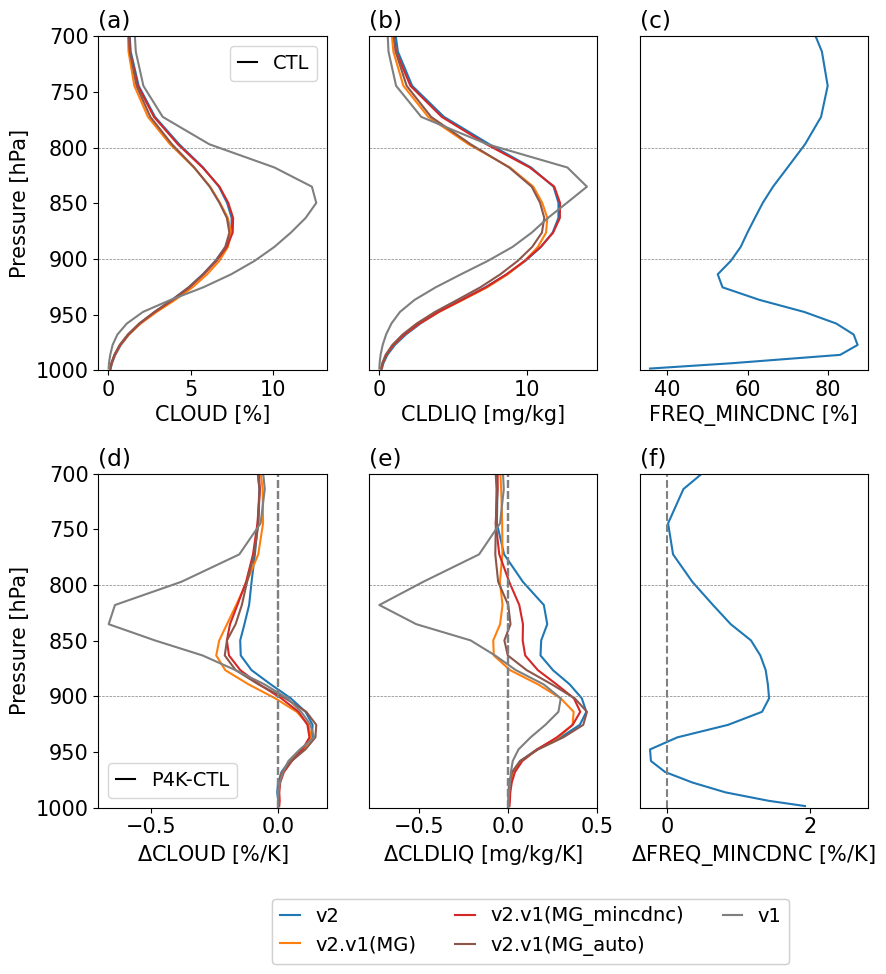

In [5]:
# Redefine colors...
tab10c = v1v2.get_color('tab10',10)
v2c = tab10c[0] 
MGc = tab10c[1]
MG_Bergc = tab10c[2]
MG_mincdncc = tab10c[3]
MG_accrec = tab10c[4]
MG_autoc = tab10c[5]
MG_wsubc = tab10c[6]
v1c = 'tab:grey'

caseA = [
    ['v2.OutTend','v2',v2c,'-'],
    ['v2.bk.MG','v2.v1(MG)',MGc,'-'],
    # ['v2.bk.MG_Berg','v2.v1(MG_WBF)',MG_Bergc,'-'],
    ['v2.bk.MG_mincdnc','v2.v1(MG_mincdnc)',MG_mincdncc,'-'],
    # ['v2.bk.MG_accre','v2.v1(MG_accre)',MG_accrec,'-'],
    ['v2.bk.MG_auto','v2.v1(MG_auto)',MG_autoc,'-'],
    # [ 'v2.bk.MG_wsub','v2.v1(MG_wsub)',MG_wsubc,'-'],
    ['v1','v1',v1c,'-'],
    ]


# # SP figure 
# caseA = [
#     ['v2.OutTend','v2',v2c,'-'],
#     ['v2.bk.MG','v2.v1(MG)',MGc,'-'],
#     ['v2.bk.MG_Berg','v2.v1(MG_WBF)',MG_Bergc,'-'],
#     # ['v2.bk.MG_mincdnc','v2.v1(MG_mincdnc)',MG_mincdncc,'-'],
#     ['v2.bk.MG_accre','v2.v1(MG_accre)',MG_accrec,'-'],
#     # ['v2.bk.MG_auto','v2.v1(MG_auto)',MG_autoc,'-'],
#     [ 'v2.bk.MG_wsub','v2.v1(MG_wsub)',MG_wsubc,'-'],
#     ['v1','v1',v1c,'-'],
#     ]

case_stamp = [val[0] for val in caseA]
case_stamp_out = [val[1] for val in caseA]
colorsh = [val[2] for val in caseA] 
lsh = [val[3] for val in caseA] 

# colorsh = v1v2.get_color('tab10',len(case_stamp_out))


focus_region = 'TropMarineLow' #'MidLat', 'MarineLow','TropAscent'

do_spc_region = False
# latS = -30
# latE = -10
# lonS = 250 #240
# lonE = 280 

# latS = -20
# latE = -10
# lonS = 255 #240
# lonE = 260 

latS = -30
latE = -10
lonS = 70
lonE = 110

VarsA = [
    ['CLOUD','CLOUD','%'],
    ['CLDLIQ','CLDLIQ','mg/kg'],
    ['FREQ_MINCDNC_A','FREQ_MINCDNC','%'],
    # ['AWNC','cm-3'],
    # ['NUMLIQ','NUMLIQ','1/kg'],
    # ['CLDICE','mg/kg'],
    # ['RELHUM','%'],
    # ['OMEGA','hPa/day'],
]

Vars = [svar[0] for svar in VarsA]
Vars_out = [svar[1] for svar in VarsA] 
Vars_units = [svar[2] for svar in VarsA] 

       
# ================ read data ========================
datadir = workdir+'diag_feedback_E3SM/data/'


dics = {}
for ivar,svar in enumerate(Vars):    
    dics[svar] = {}
    for icase,case in enumerate(case_stamp):
        if svar == 'FREQ_MINCDNC_A':
            if case == 'v2.OutTend':
                case = 'v2.freq_mincdnc'
            # elif case == 'v2.bk.MG_mincdnc':
            #     case = 'v2.bk.MG_mincdnc.short'
            else:
                continue
            
        f1 = xr.open_dataset(datadir+'global_'+svar+'_'+case+'.nc')
        print(datadir+'global_'+svar+'_'+case+'.nc')
        data1 = f1[svar+'_pi_clim']
        data2 = f1[svar+'_ab_clim']
        data3 = f1[svar+'_ano_clim']
        
        dics[svar][case] = []
        idata = 0 
        for data in [data1,data2,data3]:
            
            # ensure the lat and lon names 
            latnew, lonnew = list(data.coords.keys())[0], list(data.coords.keys())[1]
            data = data.rename({lonnew: 'lon',latnew: 'lat'})

            _,_,data_avg,_,_,_,_ \
                = v1v2.regime_partitioning(focus_region,omega700_pi_mm,omega700_ab_mm,omega700_avg_mm,data)
            
            if focus_region == 'MarineLow' and do_spc_region:
                print('Hello',focus_region,'do_spc_region',latS,latE,lonS,lonE)
                datap = data_avg.sel(lat=slice(latS,latE),lon=slice(lonS,lonE))
            else:
                print('Hello',focus_region)
                datap = data_avg
            dics[svar][case].append(v1v2.area_averager(datap))
                # dics[svar][case].append(v1v2.area_averager(data_avg.sel(lat=slice(-10,10))))
            # print(data_avg.coords)
        
            idata += 1
            
            # Check the regime is the right one
            # ---------------------------------------------------------------------
            if Vars[ivar] == 'AWNC' and idata == 3 and icase == 0: 
                fig = plt.figure(figsize=(18,9))
                nrow = 3
                ncol = 3 
                jj = 0 
                for slev in [
                    210,400,600,800,850,900,
                ]:
                    print(datap.lev.sel(lev=slev,method='nearest').values)
                    datapp = datap.sel(lev=slev,method='nearest')
                    # datapp = datap
                    ax = fig.add_subplot(nrow,ncol,jj+1,projection=ccrs.PlateCarree(180.))
                    # im = ax.pcolormesh(datapp.lon,datapp.lat,v1v2.wgt_p_LevLatLon(datapp,datap.lev), # vertically-integrated 
                    im = ax.pcolormesh(datapp.lon,datapp.lat, datapp,
                                       transform=ccrs.PlateCarree(),
                                        cmap = 'RdBu_r',
                                       # vmin = 0, vmax = 0.2,
                                       # vmin=-0.01,vmax=0.01,
                                       norm=mcolors.CenteredNorm(),
                               )

                    ax.coastlines()
                    ax.set_global()
                    ax.set_title(svar+' Lev='+str(slev)+'hPa')
                    for yref in [-30,30,-60,60]:
                        ax.axhline(y=yref,ls='--',c='grey',lw=0.5)
                    fig.colorbar(im,ax=ax,fraction=0.02)
                    
                    jj += 1
                
                    if focus_region == 'MarineLow' and do_spc_region:
                        # add box 
                        lw = 2
                        a2 = 0.3
                        ax.add_patch(mpatches.Rectangle(xy=[lonS, latS], width=lonE-lonS, height=latE-latS,
                                                   edgecolor='black',
                                                   linewidth=lw,
                                                   facecolor='none',
                                                   alpha=1.0,
                                                   transform=ccrs.PlateCarree())
                                )
        
            # ---------------------------------------------------------------------
            
            
print(dics.keys())

# ----------------------------------------------------------------
# Plotting cloud profiles
# ----------------------------------------------------------------
nrow = 2
ncol = len(Vars)
# fig = plt.figure(figsize=(12/4*ncol,9))
fig = plt.figure(figsize=(3*ncol,9))

top_lev = 700
# top_lev = 0
bot_lev = 1000

for ivar,svar in enumerate(Vars):
    
    ax = fig.add_subplot(nrow,ncol,ivar+1)
    axd = fig.add_subplot(nrow,ncol,ivar+1+len(Vars))
    
    LLa = [] 
    for icase,case in enumerate(dics[svar].keys()):
        [data1, data2, data3] = dics[svar][case]
    
        if svar in ['RCM_CLUBB','RCMINLAYER_CLUBB']:
            scale = 1e3 # change from kg/kg to g/kg
        elif svar in ['CLDLIQ','CLDICE']:
            scale = 1e6 # kg/kg -> mg/kg 
        elif svar == 'OMEGA':
            scale = 864 # change from Pa/s to hPa/day 
        elif svar == 'CLOUD':
            scale = 100 # fraction -> %
        elif svar in ['FREQ_MINCDNC_01','FREQ_MINCDNC_A']:
            scale = 100 # fraction -> %
        elif svar == 'AWNC':
            scale = 1e-6 # m-3 -> cm-3 
        else:
            scale = 1.0
            
        data1p = data1.sel(lev=slice(bot_lev,top_lev-100)) * scale
        data2p = data2.sel(lev=slice(bot_lev,top_lev-100)) * scale 
        data3p = data3.sel(lev=slice(bot_lev,top_lev-100)) * scale 
        
        if icase == 0:
            label_1 = 'CTL'
            label_2 = 'P4K'
            label_3 = 'P4K-CTL'
        else:
            label_1 = '_nolegend_'
            label_2 = '_nolegend_'
            label_3 = '_nolegend_'
           
        if 'FREQ_MINCDNC' in svar and icase == 1:
            idx = case_stamp.index('v2.bk.MG_mincdnc')
            print('idx=',idx)
            c = colorsh[idx] 
        else:
            c = colorsh[icase]
        LL = ax.plot(data1p,data1p.lev,color=c,ls=lsh[icase],label=label_1)
        # ax.plot(data2p,data2p.lev,color=colorsh[icase],ls='--',label=label_2)
        axd.plot(data3p,data3p.lev,color=c,ls=lsh[icase],marker='None',label=label_3)
        # axd.plot(data2p-data1p,data3p.lev,color=c,ls='--',marker='None',label=label_3)

        # print(dics[svar].keys())
#         diff = dics[svar]['v2.OutTend'][0].sel(lev=slice(bot_lev,top_lev-100)).values * scale \
#                  -dics[svar]['v2.bk.MG_mincdnc'][0].sel(lev=slice(bot_lev,top_lev-100)).values * scale
        
        # print(dics[svar]['v2.OutTend'][0].sel(lev=slice(bot_lev,top_lev-100)).values * scale)
        # print(dics[svar]['v2.bk.MG_mincdnc'][0].sel(lev=slice(bot_lev,top_lev-100)).values * scale)
        # print(diff)
        # if icase == 0:
        #     axd.plot(diff,data1p.lev,label='v2-v1')
        
        LLa.append(LL[0])
        
        ax.set_ylim((bot_lev,top_lev))
        axd.set_ylim((bot_lev,top_lev))
        axd.axvline(x=0,ls='--',color='grey')
        
        
    if ivar == 0: 
        # lg = fig.legend(LLa,case_stamp_out,bbox_to_anchor=(0.40,0.73,0.8,0.1),ncol=1)
        
        if 'v2.bk.MG_Berg' in case_stamp: 
            lg = fig.legend(LLa,case_stamp_out,bbox_to_anchor=(0.30,-0.1,0.6,0.1),ncol=2)
        else:
            lg = fig.legend(LLa,case_stamp_out,bbox_to_anchor=(0.10,-0.1,0.8,0.1),ncol=3)
            
        lg1 = ax.legend(loc='upper right')
        lg1.legendHandles[0].set_color('black')
        # lg1.legendHandles[1].set_color('black')
        ax.add_artist(lg)
        ax.set_ylabel('Pressure [hPa]')
        
        axd.set_ylabel('Pressure [hPa]')
        lgd = axd.legend(loc='lower left')
        lgd.legendHandles[0].set_color('black')
    else:
        ax.set_yticks([])
        axd.set_yticks([])
           
    ax.set_title('('+chr(ord('`')+(ivar+1))+') ',loc='left')
    axd.set_title('('+chr(ord('`')+(ivar+ncol+1))+') ',loc='left')

    ax.axhline(y=900,ls='--',color='grey',lw=0.5)
    ax.axhline(y=800,ls='--',color='grey',lw=0.5)
  
    axd.axhline(y=900,ls='--',color='grey',lw=0.5)
    axd.axhline(y=800,ls='--',color='grey',lw=0.5)
    
    ax.set_xlabel(Vars_out[ivar]+' ['+Vars_units[ivar]+']')
    axd.set_xlabel('$\Delta$'+Vars_out[ivar]+' ['+Vars_units[ivar]+'/K]')
    # axd.set_xlabel('$\Delta$'+svar+' ['+Vars_units[ivar]+']')
    
fig.tight_layout()

if 'v2.bk.MG_Berg' in case_stamp: 
    print('Saving the SP figure.')
    fig.savefig(figdir+'Profiles_clouds_'+tag+'_FixedRegime_'+focus_region+'_'+tag3+'_SP_'+dd+'.png',dpi=300,bbox_inches='tight')
else:
    fig.savefig(figdir+'Profiles_clouds_'+tag+'_FixedRegime_'+focus_region+'_'+tag3+'_'+dd+'.png',dpi=300,bbox_inches='tight')



# Figure S5 - cloud profile

/home/qin4/From_Compy/home_dir/diag_feedback_E3SM/data/global_CLOUD_v2.OutTend.nc
Hello TropMarineLow
Hello TropMarineLow
Hello TropMarineLow
/home/qin4/From_Compy/home_dir/diag_feedback_E3SM/data/global_CLOUD_v2.bk.MG.nc
Hello TropMarineLow
Hello TropMarineLow
Hello TropMarineLow
/home/qin4/From_Compy/home_dir/diag_feedback_E3SM/data/global_CLOUD_v2.bk.MG_Berg.nc
Hello TropMarineLow
Hello TropMarineLow
Hello TropMarineLow
/home/qin4/From_Compy/home_dir/diag_feedback_E3SM/data/global_CLOUD_v2.bk.MG_accre.nc
Hello TropMarineLow
Hello TropMarineLow
Hello TropMarineLow
/home/qin4/From_Compy/home_dir/diag_feedback_E3SM/data/global_CLOUD_v2.bk.MG_wsub.nc
Hello TropMarineLow
Hello TropMarineLow
Hello TropMarineLow
/home/qin4/From_Compy/home_dir/diag_feedback_E3SM/data/global_CLOUD_v1.nc
Hello TropMarineLow
Hello TropMarineLow
Hello TropMarineLow
/home/qin4/From_Compy/home_dir/diag_feedback_E3SM/data/global_CLDLIQ_v2.OutTend.nc
Hello TropMarineLow
Hello TropMarineLow
Hello TropMarineLow
/home

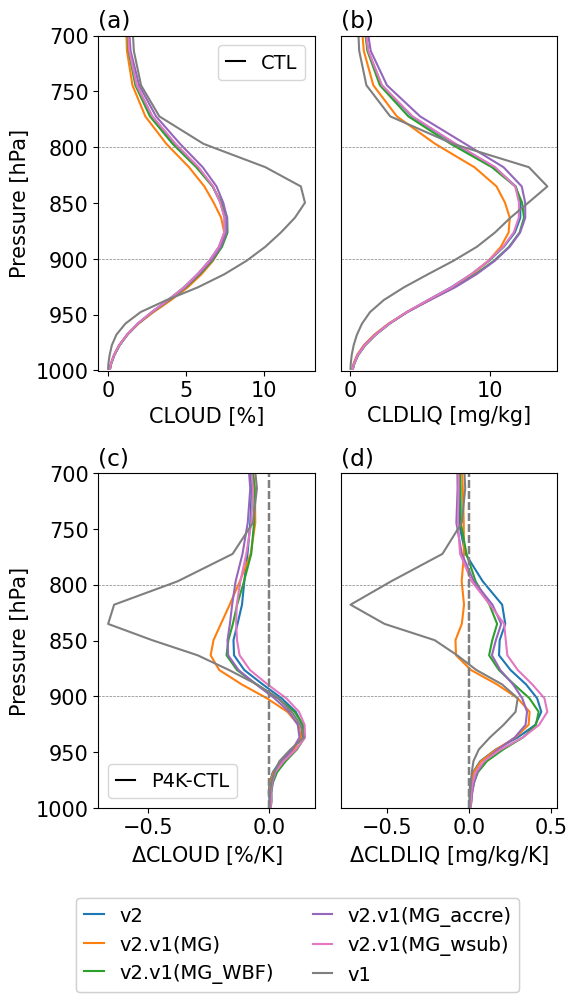

In [7]:
# Redefine colors...
tab10c = v1v2.get_color('tab10',10)
v2c = tab10c[0] 
MGc = tab10c[1]
MG_Bergc = tab10c[2]
MG_mincdncc = tab10c[3]
MG_accrec = tab10c[4]
MG_autoc = tab10c[5]
MG_wsubc = tab10c[6]
v1c = 'tab:grey'

caseA = [
    ['v2.OutTend','v2',v2c,'-'],
    ['v2.bk.MG','v2.v1(MG)',MGc,'-'],
    ['v2.bk.MG_Berg','v2.v1(MG_WBF)',MG_Bergc,'-'],
    # ['v2.bk.MG_mincdnc','v2.v1(MG_mincdnc)',MG_mincdncc,'-'],
    ['v2.bk.MG_accre','v2.v1(MG_accre)',MG_accrec,'-'],
    # ['v2.bk.MG_auto','v2.v1(MG_auto)',MG_autoc,'-'],
    [ 'v2.bk.MG_wsub','v2.v1(MG_wsub)',MG_wsubc,'-'],
    ['v1','v1',v1c,'-'],
    ]

case_stamp = [val[0] for val in caseA]
case_stamp_out = [val[1] for val in caseA]
colorsh = [val[2] for val in caseA] 
lsh = [val[3] for val in caseA] 

# colorsh = v1v2.get_color('tab10',len(case_stamp_out))


focus_region = 'TropMarineLow' #'MidLat', 'MarineLow','TropAscent'

do_spc_region = False

VarsA = [
    ['CLOUD','CLOUD','%'],
    ['CLDLIQ','CLDLIQ','mg/kg'],
    # ['FREQ_MINCDNC_A','FREQ_MINCDNC','%'],
    # ['AWNC','cm-3'],
    # ['NUMLIQ','NUMLIQ','1/kg'],
    # ['CLDICE','mg/kg'],
    # ['RELHUM','%'],
    # ['OMEGA','hPa/day'],
]

Vars = [svar[0] for svar in VarsA]
Vars_out = [svar[1] for svar in VarsA] 
Vars_units = [svar[2] for svar in VarsA] 

       
# ================ read data ========================
datadir = workdir+'diag_feedback_E3SM/data/'


dics = {}
for ivar,svar in enumerate(Vars):    
    dics[svar] = {}
    for icase,case in enumerate(case_stamp):
        if svar == 'FREQ_MINCDNC_A':
            if case == 'v2.OutTend':
                case = 'v2.freq_mincdnc'
            # elif case == 'v2.bk.MG_mincdnc':
            #     case = 'v2.bk.MG_mincdnc.short'
            else:
                continue
            
        f1 = xr.open_dataset(datadir+'global_'+svar+'_'+case+'.nc')
        print(datadir+'global_'+svar+'_'+case+'.nc')
        data1 = f1[svar+'_pi_clim']
        data2 = f1[svar+'_ab_clim']
        data3 = f1[svar+'_ano_clim']
        
        dics[svar][case] = []
        idata = 0 
        for data in [data1,data2,data3]:
            
            # ensure the lat and lon names 
            latnew, lonnew = list(data.coords.keys())[0], list(data.coords.keys())[1]
            data = data.rename({lonnew: 'lon',latnew: 'lat'})

            _,_,data_avg,_,_,_,_ \
                = v1v2.regime_partitioning(focus_region,omega700_pi_mm,omega700_ab_mm,omega700_avg_mm,data)
            
            if focus_region == 'MarineLow' and do_spc_region:
                print('Hello',focus_region,'do_spc_region',latS,latE,lonS,lonE)
                datap = data_avg.sel(lat=slice(latS,latE),lon=slice(lonS,lonE))
            else:
                print('Hello',focus_region)
                datap = data_avg
            dics[svar][case].append(v1v2.area_averager(datap))
                # dics[svar][case].append(v1v2.area_averager(data_avg.sel(lat=slice(-10,10))))
            # print(data_avg.coords)
        
            idata += 1
            
            # Check the regime is the right one
            # ---------------------------------------------------------------------
            if Vars[ivar] == 'AWNC' and idata == 3 and icase == 0: 
                fig = plt.figure(figsize=(18,9))
                nrow = 3
                ncol = 3 
                jj = 0 
                for slev in [
                    210,400,600,800,850,900,
                ]:
                    print(datap.lev.sel(lev=slev,method='nearest').values)
                    datapp = datap.sel(lev=slev,method='nearest')
                    # datapp = datap
                    ax = fig.add_subplot(nrow,ncol,jj+1,projection=ccrs.PlateCarree(180.))
                    # im = ax.pcolormesh(datapp.lon,datapp.lat,v1v2.wgt_p_LevLatLon(datapp,datap.lev), # vertically-integrated 
                    im = ax.pcolormesh(datapp.lon,datapp.lat, datapp,
                                       transform=ccrs.PlateCarree(),
                                        cmap = 'RdBu_r',
                                       # vmin = 0, vmax = 0.2,
                                       # vmin=-0.01,vmax=0.01,
                                       norm=mcolors.CenteredNorm(),
                               )

                    ax.coastlines()
                    ax.set_global()
                    ax.set_title(svar+' Lev='+str(slev)+'hPa')
                    for yref in [-30,30,-60,60]:
                        ax.axhline(y=yref,ls='--',c='grey',lw=0.5)
                    fig.colorbar(im,ax=ax,fraction=0.02)
                    
                    jj += 1
                
                    if focus_region == 'MarineLow' and do_spc_region:
                        # add box 
                        lw = 2
                        a2 = 0.3
                        ax.add_patch(mpatches.Rectangle(xy=[lonS, latS], width=lonE-lonS, height=latE-latS,
                                                   edgecolor='black',
                                                   linewidth=lw,
                                                   facecolor='none',
                                                   alpha=1.0,
                                                   transform=ccrs.PlateCarree())
                                )
        
            # ---------------------------------------------------------------------
            
            
print(dics.keys())

# ----------------------------------------------------------------
# Plotting cloud profiles
# ----------------------------------------------------------------
nrow = 2
ncol = len(Vars)
# fig = plt.figure(figsize=(12/4*ncol,9))
fig = plt.figure(figsize=(3*ncol,9))

top_lev = 700
# top_lev = 0
bot_lev = 1000

for ivar,svar in enumerate(Vars):
    
    ax = fig.add_subplot(nrow,ncol,ivar+1)
    axd = fig.add_subplot(nrow,ncol,ivar+1+len(Vars))
    
    LLa = [] 
    for icase,case in enumerate(dics[svar].keys()):
        [data1, data2, data3] = dics[svar][case]
    
        if svar in ['RCM_CLUBB','RCMINLAYER_CLUBB']:
            scale = 1e3 # change from kg/kg to g/kg
        elif svar in ['CLDLIQ','CLDICE']:
            scale = 1e6 # kg/kg -> mg/kg 
        elif svar == 'OMEGA':
            scale = 864 # change from Pa/s to hPa/day 
        elif svar == 'CLOUD':
            scale = 100 # fraction -> %
        elif svar in ['FREQ_MINCDNC_01','FREQ_MINCDNC_A']:
            scale = 100 # fraction -> %
        elif svar == 'AWNC':
            scale = 1e-6 # m-3 -> cm-3 
        else:
            scale = 1.0
            
        data1p = data1.sel(lev=slice(bot_lev,top_lev-100)) * scale
        data2p = data2.sel(lev=slice(bot_lev,top_lev-100)) * scale 
        data3p = data3.sel(lev=slice(bot_lev,top_lev-100)) * scale 
        
        if icase == 0:
            label_1 = 'CTL'
            label_2 = 'P4K'
            label_3 = 'P4K-CTL'
        else:
            label_1 = '_nolegend_'
            label_2 = '_nolegend_'
            label_3 = '_nolegend_'
           
        if 'FREQ_MINCDNC' in svar and icase == 1:
            idx = case_stamp.index('v2.bk.MG_mincdnc')
            print('idx=',idx)
            c = colorsh[idx] 
        else:
            c = colorsh[icase]
        LL = ax.plot(data1p,data1p.lev,color=c,ls=lsh[icase],label=label_1)
        # ax.plot(data2p,data2p.lev,color=colorsh[icase],ls='--',label=label_2)
        axd.plot(data3p,data3p.lev,color=c,ls=lsh[icase],marker='None',label=label_3)
        # axd.plot(data2p-data1p,data3p.lev,color=c,ls='--',marker='None',label=label_3)

        # print(dics[svar].keys())
#         diff = dics[svar]['v2.OutTend'][0].sel(lev=slice(bot_lev,top_lev-100)).values * scale \
#                  -dics[svar]['v2.bk.MG_mincdnc'][0].sel(lev=slice(bot_lev,top_lev-100)).values * scale
        
        # print(dics[svar]['v2.OutTend'][0].sel(lev=slice(bot_lev,top_lev-100)).values * scale)
        # print(dics[svar]['v2.bk.MG_mincdnc'][0].sel(lev=slice(bot_lev,top_lev-100)).values * scale)
        # print(diff)
        # if icase == 0:
        #     axd.plot(diff,data1p.lev,label='v2-v1')
        
        LLa.append(LL[0])
        
        ax.set_ylim((bot_lev,top_lev))
        axd.set_ylim((bot_lev,top_lev))
        axd.axvline(x=0,ls='--',color='grey')
        
        
    if ivar == 0: 
        # lg = fig.legend(LLa,case_stamp_out,bbox_to_anchor=(0.40,0.73,0.8,0.1),ncol=1)
        
        if 'v2.bk.MG_Berg' in case_stamp: 
            lg = fig.legend(LLa,case_stamp_out,bbox_to_anchor=(0.30,-0.1,0.6,0.1),ncol=2)
        else:
            lg = fig.legend(LLa,case_stamp_out,bbox_to_anchor=(0.10,-0.1,0.8,0.1),ncol=3)
            
        lg1 = ax.legend(loc='upper right')
        lg1.legendHandles[0].set_color('black')
        # lg1.legendHandles[1].set_color('black')
        ax.add_artist(lg)
        ax.set_ylabel('Pressure [hPa]')
        
        axd.set_ylabel('Pressure [hPa]')
        lgd = axd.legend(loc='lower left')
        lgd.legendHandles[0].set_color('black')
    else:
        ax.set_yticks([])
        axd.set_yticks([])
           
    ax.set_title('('+chr(ord('`')+(ivar+1))+') ',loc='left')
    axd.set_title('('+chr(ord('`')+(ivar+ncol+1))+') ',loc='left')

    ax.axhline(y=900,ls='--',color='grey',lw=0.5)
    ax.axhline(y=800,ls='--',color='grey',lw=0.5)
  
    axd.axhline(y=900,ls='--',color='grey',lw=0.5)
    axd.axhline(y=800,ls='--',color='grey',lw=0.5)
    
    ax.set_xlabel(Vars_out[ivar]+' ['+Vars_units[ivar]+']')
    axd.set_xlabel('$\Delta$'+Vars_out[ivar]+' ['+Vars_units[ivar]+'/K]')
    # axd.set_xlabel('$\Delta$'+svar+' ['+Vars_units[ivar]+']')
    
fig.tight_layout()

if 'v2.bk.MG_Berg' in case_stamp: 
    print('Saving the SP figure.')
    fig.savefig(figdir+'Profiles_clouds_'+tag+'_FixedRegime_'+focus_region+'_'+tag3+'_SP_'+dd+'.png',dpi=300,bbox_inches='tight')
else:
    fig.savefig(figdir+'Profiles_clouds_'+tag+'_FixedRegime_'+focus_region+'_'+tag3+'_'+dd+'.png',dpi=300,bbox_inches='tight')



# plot T5050 vs feedback

In [8]:
# %load plot_T5050_fdbk_subplot.py

def draw_curve(p1, p2):
    '''
    function to draw curve between two dots
    '''
    a = (p2[1] - p1[1])/(np.cosh(p2[0])-np.cosh(p1[0]))
    b = p1[1] - a * np.cosh(p1[0])
    x = np.linspace(p1[0], p2[0], 100)
    y = a * np.cosh(x) + b
    return x, y

## define cases

In [9]:
datadir = workdir+'diag_feedback_E3SM/data/'

tab20c = v1v2.get_color('tab20',20)

v1Allc = tab20c[6]
gwc = tab20c[7]
trigc = tab20c[5]
gustc = tab20c[4]
ZMc = tab20c[3]
MGc = tab20c[2]
clubbc = tab20c[1]
v2c = tab20c[0] 

MG_Bergc = tab20c[9]
MG_mincdncc = tab20c[11]
MG_accrec = tab20c[13]
MG_autoc = tab20c[15]
MG_wsubc = tab20c[17]

# define cases 
cases = [\
'v2.bk.MG',\
'v2.bk.MG_Berg',\
'v2.bk.MG_mincdnc',\
'v2.bk.MG_accre',\
'v2.bk.MG_auto',\
'v2.bk.MG_wsub',\
'v2',\
# 'v2.bk.trig',\
# 'v2.bk.ZM',\
# 'v2.bk.clubb',\
# 'v1',\
]

cases_out = [
'v2.v1(MG)',
'v2.v1(MG_WBF)',
'v2.v1(MG_mincdnc)',
'v2.v1(MG_accre)',
'v2.v1(MG_auto)',
'v2.v1(MG_wsub)',
'v2',
# 'v2.v1(ZMtrig)',\
# 'v2.v1(ZMother)',\
# 'v2.v1(clubb)',\
# 'v1',
]

colorsh = [\
    MGc,
    MG_Bergc,
    MG_mincdncc,
    MG_accrec, 
    MG_autoc, 
    MG_wsubc,
    v2c,
    # trigc,  
    # ZMc,
    # clubbc,
    # v1c,
]

latSs = [-30]
latEs = [-80]
nlats = range(len(latSs))
#marks = ['o']
latSss = ['30S']
latEss = ['80S']

## plot LCF profiles

T5050 =  247.93687107291353
T5050 =  242.80286341193045
T5050 =  259.49669278235643
T5050 =  258.30815942307174
T5050 =  258.7899697154459
T5050 =  258.0601698829013
T5050 =  258.2307603504529


Text(0.5, 0, 'T [°C]')

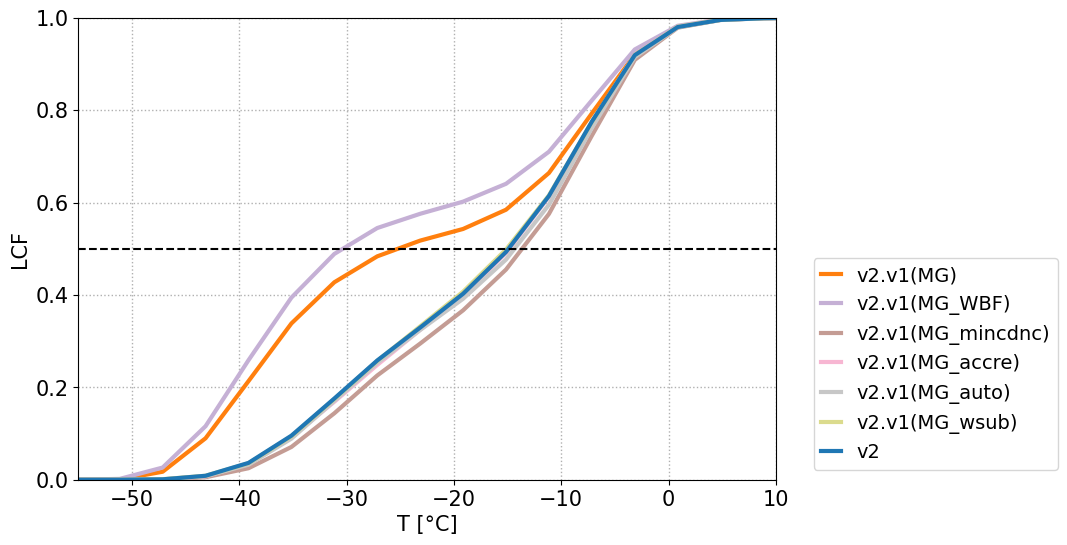

In [15]:
# read LCF 

fig = plt.figure(figsize=(9,6))
nrow = 1
ncol = 1
ax = fig.add_subplot(nrow,ncol,1)

for icase,case in enumerate(cases): 
    df = pd.read_csv(workdir+'scripts/middata_v1v2/LCF_binned_by_temperature_'+case+'_20bins-LandOcean.csv',index_col=0)
    # print(df)
    yy = df.loc[:,'temp']
    xx = df.loc[:,'bin']
    T5050 = np.interp(0.5, xx,yy)
    print('T5050 = ',T5050)
    
    ax.plot(yy-273.15,xx, label=cases_out[icase],c=colorsh[icase],lw=3)

ax.legend(bbox_to_anchor=(1.04,0), loc='lower left')
ax.set_ylim((0,1))
ax.set_xlim((-55,10))

ax.axhline(y=0.5,ls='--',c='black')
ax.grid(ls=':',lw=1.0)

ax.set_ylabel('LCF')
ax.set_xlabel('T [\N{DEGREE SIGN}C]')
# fig.savefig(figdir+'LCF_profiles_NHSH_SinglyRevertedExps_'+dd+'.png', dpi=300, bbox_inches='tight')

## Figure 10 - T5050 vs cloud feedback

amt v2.bk.MG 0.3724786093822155
T5050 =  247.93687107291353
amt v2.bk.MG_Berg 0.36349537090570005
T5050 =  242.80286341193045
amt v2.bk.MG_mincdnc 0.3538217019091
T5050 =  259.49669278235643
amt v2.bk.MG_accre 0.3415731319979648
T5050 =  258.30815942307174
amt v2.bk.MG_auto 0.3500459103400483
T5050 =  258.7899697154459
amt v2.bk.MG_wsub 0.36022940938217335
T5050 =  258.0601698829013
amt v2 0.3336573644967445
T5050 =  258.2307603504529
v2 v2.v1(MG)
tau v2.bk.MG 0.1534425157524246
T5050 =  247.93687107291353
tau v2.bk.MG_Berg 0.11690573450498064
T5050 =  242.80286341193045
tau v2.bk.MG_mincdnc 0.007214359304907059
T5050 =  259.49669278235643
tau v2.bk.MG_accre -0.051102659812119706
T5050 =  258.30815942307174
tau v2.bk.MG_auto 0.025806927682146787
T5050 =  258.7899697154459
tau v2.bk.MG_wsub -0.06194776852145374
T5050 =  258.0601698829013
tau v2 0.011844597165145005
T5050 =  258.2307603504529
v2 v2.v1(MG)
alt v2.bk.MG 0.6115668237407148
T5050 =  247.93687107291353
alt v2.bk.MG_Berg 0.632

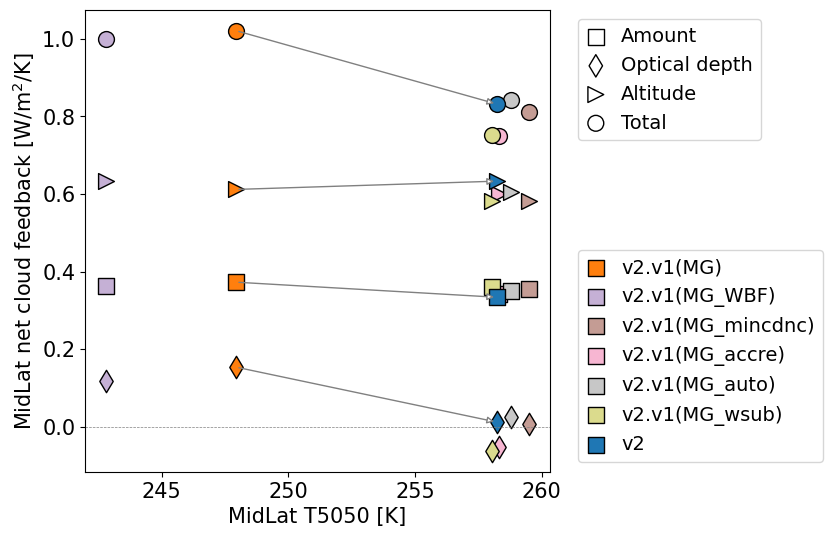

In [17]:
# cmap = plt.get_cmap("tab20")

fig = plt.figure(figsize=(6,6))
nrow = 1
ncol = 1

ax = fig.add_subplot(nrow,ncol,1)

Vars = ['amt','tau','alt','tot']
Vars_out = ['Amount','Optical depth','Altitude','Total']
marks = ['s','d','>','o'] 
Lvar = []

for ivar,svar in enumerate(Vars):
    
    for ilat,latS,latE in zip(nlats,latSs,latEs):
    
        # read cloud feedbacks
        dic_fbk = {}
        dic_l2c = {}
        for icase,case in enumerate(cases):
            
            case_out = cases_out[icase]
        
            f = xr.open_dataset(datadir+'global_cloud_feedback_'+case+'.nc')
            var1 = 'ALL_SWcld_'+svar
            var2 = 'ALL_LWcld_'+svar
            da = f[var1]+f[var2]
            
            latnew, lonnew = list(da.coords.keys())[0], list(da.coords.keys())[1]
            da = da.rename({lonnew: 'lon',latnew: 'lat'})
            # print(case, 'fbk.shape=',da.shape)
            # print(da.coords)
            
            da_ocn = da
            
            # 30-60 N/S average
            da1 = da_ocn.where((da_ocn.lat<-30) & (da_ocn.lat>-60))
            da2 = xr.where((da_ocn.lat>30) & (da_ocn.lat<60),da_ocn,da1)
            dic_fbk[case_out] = v1v2.area_averager(da2)
            print(svar, case, dic_fbk[case_out].values)
            
            # fig = plt.figure()
            # ax = fig.add_subplot(1,1,1)
            # ax.contourf(da2)
            # sys.exit()

            # read LCF 
            df = pd.read_csv(workdir+'scripts/middata_v1v2/LCF_binned_by_temperature_'+case+'_20bins-LandOcean.csv',index_col=0)
            # print(df)
            yy = df.loc[:,'temp']
            xx = df.loc[:,'bin']
            T5050 = np.interp(0.5, xx,yy)
            print('T5050 = ',T5050)

            dic_l2c[case_out] = T5050
            
        # =============== scatter plot: cloud feedback from each case and the ratio
        for icase,case_out in enumerate(dic_fbk.keys()):
            if ilat == 0 and ivar == 0:
                label = case_out
            else:
                label = '_nolegend_'
            
            if svar == 'tot':
                ec = 'black'
            else:
                # ec = 'None'
                ec = 'black'
            L1 = ax.scatter(dic_l2c[case_out], dic_fbk[case_out],label=label,marker=marks[ivar],
                            facecolor=colorsh[icase],edgecolor=ec,
                            s=130)
            
            # print(case_out,svar,dic_fbk[case_out])
        
        if ilat == 0:
            La = L1
        else:
            Lb = L1

        Lvar.append(L1)
    

        # draw curve between some points
        lw = 0.5
        if ilat == 0:
 
            case1 = ['v2']
            # case2s = [['v2.v1(MG)'],['v2.v1(MG_Berg)'],['v2.v1(MG_mincdnc)'],['v2.v1(MG_accre)'],['v2.v1(MG_auto)']]
            case2s = [['v2.v1(MG)']]
                      
            for case2 in case2s:
                for c1,c2 in zip(case1,case2):
                    print(c1,c2)
                    p1 = [np.array(dic_l2c[c1]), np.array(dic_fbk[c1])]
                    p2 = [np.array(dic_l2c[c2]), np.array(dic_fbk[c2])]
                    
                    # xyA = p1
                    # xyB = p2
                    
                    xyA = p2
                    xyB = p1
                    
                    coordsA = "data"
                    coordsB = "data"
                    con = ConnectionPatch(xyA, xyB, coordsA, coordsB,
                              color='grey',
                              arrowstyle="-|>", shrinkA=2, shrinkB=2,
                              mutation_scale=10, fc="w")
                    ax.add_artist(con)
    
        ax.set_ylabel('MidLat net cloud feedback [W/m$^2$/K]')
        ax.set_xlabel('MidLat T5050 [K]')
    
    
    # ax.set_ylim((-0.5,0.8))
    # ax.set_xlim((220,290))

legend_var = plt.legend(Lvar,Vars_out,bbox_to_anchor=(1.04,1),loc='upper left')
for lg in legend_var.legendHandles:
    lg.set_color('None')
    lg.set_edgecolor('black')

ax.legend(bbox_to_anchor=(1.04,0), loc='lower left')
ax.add_artist(legend_var)


ax.axhline(y=0,ls='--',color='grey',lw=0.5)

fig.savefig(figdir+'Scatter_T5050_fdbk_LandOcean_'+dd+'.png',dpi=300,bbox_inches='tight')
fig.savefig(figdir+'Scatter_T5050_fdbk_LandOcean_'+dd+'.pdf',bbox_inches='tight')


# Figure 11 - Pressure-Lat CLDLIQ only NH+SH MidLat

svar0= CLDLIQ svar= CLDLIQ
data1.shape= (72, 73, 144)
svar0= T svar= T
data1.shape= (72, 73, 144)
svar0= CLDLIQ svar= CLDLIQ
data1.shape= (72, 73, 144)
svar0= T svar= T
data1.shape= (72, 73, 144)
dict_keys(['v2.OutTend', 'v2.bk.MG_Berg'])
dict_keys(['CLDLIQ', 'T'])

svar= CLDLIQ
svar= T


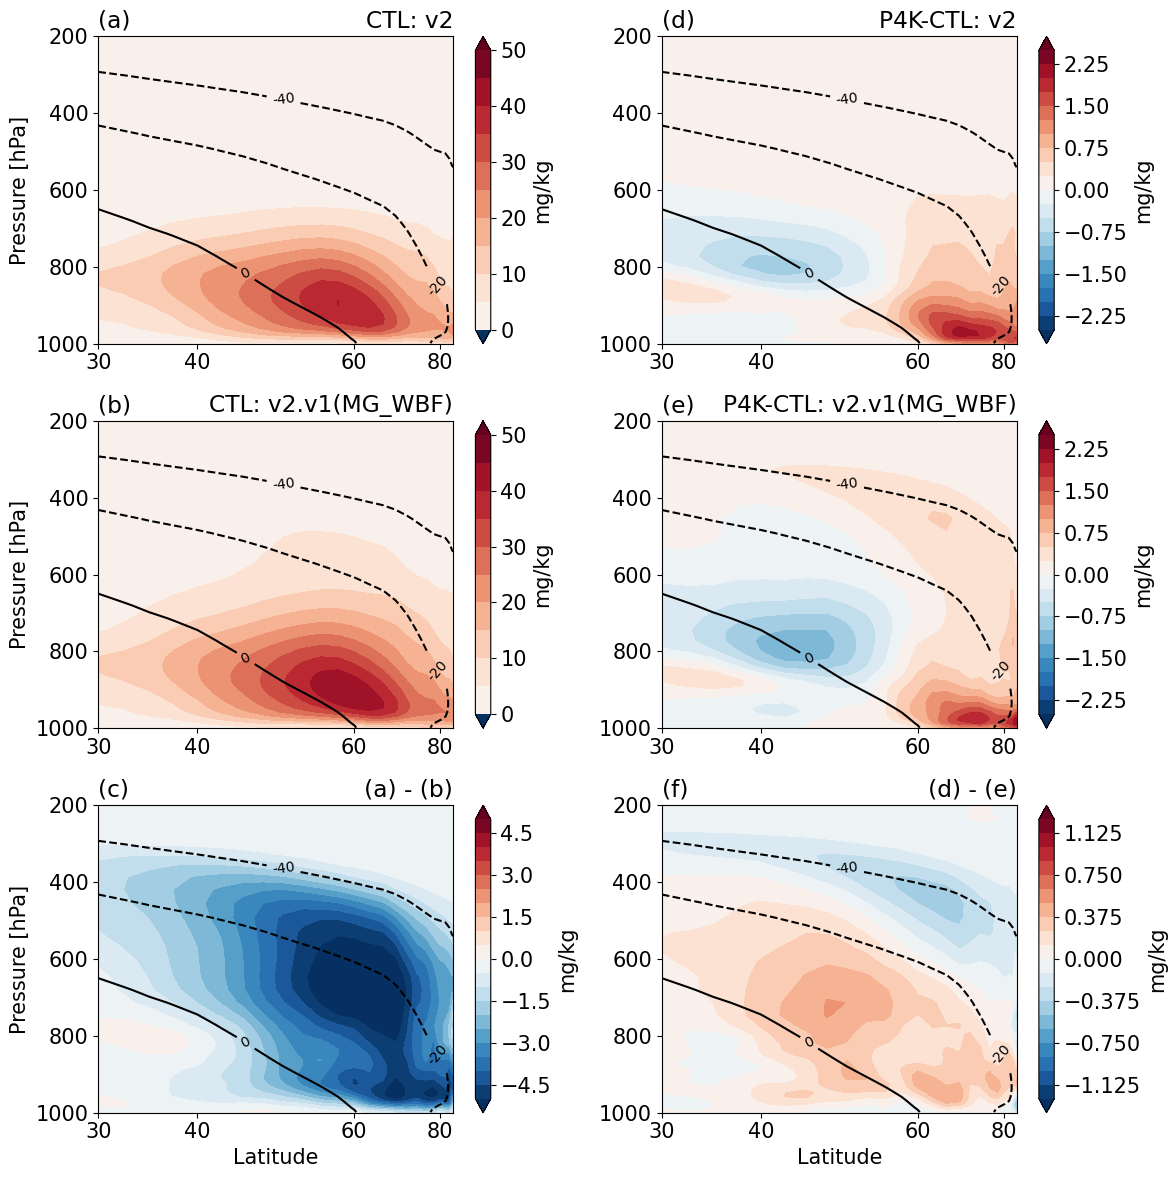

In [19]:
focus_region = 'Global' # MarineLow, MidLat

case_stamp = [
    'v2.OutTend',
    # 'v2.bk.MG',
    'v2.bk.MG_Berg',
    # 'v2.bk.MG_mincdnc',
    # 'v2.bk.MG_accre',
    # 'v2.bk.MG_auto',
    # 'v2.bk.MG_wsub',   
    ]

case_stamp_out = [
    'v2',
    # 'v2.v1(MG)',
    'v2.v1(MG_WBF)',
    # 'v2.v1(MG_mincdnc)',
    # 'v2.v1(MG_accre)',
    # 'v2.v1(MG_auto)',
    # 'v2.v1(MG_wsub)',
    ]

VarsA = [
    ['CLDLIQ','CLDLIQ [mg/kg]',],
    # ['CLDICE','CLDICE [mg/kg]',],
    # ['CLOUD','CLOUD [fraction]',],
    # ['INCLDLIQ','CLDLIQ [mg/kg]',],
    # ['INCLDICE','CLDICE [mg/kg]',],
    ['T','Temperature [K]',],
]

Vars = [svar[0] for svar in VarsA]
Vars_label = [svar[1] for svar in VarsA]

# ============== read data =====================
datadir = workdir+'diag_feedback_E3SM/data/'

dics = {}
for icase,case in enumerate(case_stamp):
    dics[case] = {}
    for svar0 in Vars:
        if svar0 in ['INCLDLIQ','INCLDICE']:
            svar = svar0.split('IN')[1]
        else:
            svar = svar0
        
        print('svar0=',svar0, 'svar=',svar)
        
        fname = 'global_'+svar+'_'+case+'.nc'
        f1 = xr.open_dataset(datadir+fname)

        if svar0 == 'T':
            data1 = f1[svar+'_pi_clim']-273.15 # K -> degC
            data2 = f1[svar+'_ab_clim']-273.15
            datad = f1[svar+'_ano_clim']-273.15
        elif svar0 in ['CLDLIQ','CLDICE']:
            data1 = f1[svar+'_pi_clim']*1e6 # kg/kg -> mg/kg
            data2 = f1[svar+'_ab_clim']*1e6
            datad = f1[svar+'_ano_clim']*1e6
        elif svar0 in ['CLOUD']:
            data1 = f1[svar+'_pi_clim']*1e2
            data2 = f1[svar+'_ab_clim']*1e2
            datad = f1[svar+'_ano_clim']*1e2
        elif svar0 in ['INCLDLIQ','INCLDICE']:
            fname1 = 'global_CLOUD_'+case+'.nc'
            f2 = xr.open_dataset(datadir+fname1)
            data1 = f1[svar+'_pi_clim']/f2['CLOUD_pi_clim']*1e6 # kg/kg->mg/kg
            data2 = f1[svar+'_ab_clim']/f2['CLOUD_ab_clim']*1e6
            datad = xr.DataArray(data2 - data1 ,coords=data1.coords)
            f2.close()
        
        print('data1.shape=',data1.shape)
        
        # ensure the lat and lon names 
        latnew, lonnew = list(data1.coords.keys())[0], list(data1.coords.keys())[1]
        data1 = data1.rename({lonnew: 'lon',latnew: 'lat'})
        data2 = data2.rename({lonnew: 'lon',latnew: 'lat'})
        datad = datad.rename({lonnew: 'lon',latnew: 'lat'})

        dics[case][svar0] = [data1,data2,datad]
        
print(dics.keys())
print(dics['v2.OutTend'].keys())
print()    
# sys.exit()
# ============== Spatial map =====================


for svar in Vars:
    print('svar=',svar)
    
    if svar == 'T':
        continue 
        
    fig = plt.figure(figsize=(12,12))
    nrow = 3
    ncol = 2

    datapA = [*[dics[case][svar][0] for case in dics.keys()], #*[dics[case][svar][1] for case in dics.keys()],
              *[dics[case_stamp[0]][svar][0]-dics[case_stamp[1]][svar][0]],
              *[dics[case][svar][2] for case in dics.keys()],
              *[dics[case_stamp[0]][svar][2]-dics[case_stamp[1]][svar][2]],
             ]
    # print(len(datapA))
    
    titleA = [*['CTL: '+case_stamp_out[icase] for icase,case in enumerate(dics.keys())],
              '   (a) - (b)',
              *['P4K-CTL: '+case_stamp_out[icase] for icase,case in enumerate(dics.keys())],
              '   (d) - (e)',
             ]
    # print(len(titleA))
    
    if svar == 'CLDLIQ': 
        maxv0 = 50  
        unit = 'mg/kg' 
    elif svar == 'CLDICE':
        maxv0 = 10 
        unit = 'mg/kg'
    elif svar == 'CLOUD':
        maxv0 = 50 
        unit = '%'
    elif svar in ['INCLDLIQ']:
        maxv0 = 150
        unit = 'mg/kg' 
    elif svar in ['INCLDICE']:
        maxv0 = 150 #30
        unit = 'mg/kg'
    
    d0 = maxv0/10. 
    maxv1 = maxv0/10.; d1 = maxv1/10.
    if svar in ['INCLDLIQ','INCLDICE']:
        maxv2 = maxv1*2; d2 = maxv2/10.  
        maxv3 = maxv2/2.; d3 = maxv3/10. 
    else:
        maxv2 = maxv1/2.; d2 = maxv2/10.  
        maxv3 = maxv2/2.; d3 = maxv3/10. 
        
    levelsA = [
            *[np.arange(0,maxv0+d0,d0)]*2,
            *[np.arange(-maxv1,maxv1+d1,d1)],
            *[np.arange(-maxv2,maxv2+d2,d2)]*2,
            *[np.arange(-maxv3,maxv3+d3,d3)],
        ]  
    
    # print(len(levelsA))

    arrayorder = [0,3,1,4,2,5]
    
    ii = 0 
    for order in arrayorder: 
        # print(ii)
        datap = datapA[order]
        
        _,_,data2_avg,_,_,_,_ \
            = v1v2.regime_partitioning(focus_region,omega700_pi_mm,omega700_ab_mm,omega700_avg_mm,datap)
        
        _,_,data2_Tavg,_,_,_,_ \
            = v1v2.regime_partitioning(focus_region,omega700_pi_mm,omega700_ab_mm,omega700_avg_mm,dics[case]['T'][0])
        
        latS = 90
        latE = 30 
        
        SH = data2_avg.sel(lat=slice(-latS,-latE))
        NH = data2_avg.isel(lat=slice(None, None, -1)).sel(lat=slice(latS,latE))        
        data2_avg_NHSH = ( NH.data + SH.data)/2.0
        
        SH = data2_Tavg.sel(lat=slice(-latS,-latE))
        NH = data2_Tavg.isel(lat=slice(None, None, -1)).sel(lat=slice(latS,latE))        
        data2_Tavg_NHSH = ( NH.data + SH.data)/2.0

        ax = fig.add_subplot(nrow,ncol,ii+1)

        data2_avg_zm = data2_avg_NHSH.mean(axis=2)
        data2_Tavg_zm = data2_Tavg_NHSH.mean(axis=2)
        
        clat = np.cos(np.deg2rad(NH.lat))
        clats = np.cumsum(clat)
    
        im = ax.contourf(clats,data2_avg.lev,data2_avg_zm,
                          levels=levelsA[order],
                         extend='both',
        # im = ax.pcolormesh(clats,data2_avg.lev,data2_avg_zm,
                        cmap='RdBu_r',
                        norm=mcolors.CenteredNorm(),
                        )

        # Nidx = np.where(np.isin(NH.lat.values,[90,80,70,50,30]))       
        Nidx = np.where(np.isin(NH.lat.values,[30,40,60,80]))       
        ax.set_xticks(clats[Nidx])
        ax.set_xticklabels(NH.lat.data[Nidx].astype(int))
        ax.set_xlim((clats[-1],clats[0]))
        
        fig.colorbar(im,ax=ax,label=unit)
        
        # add temperature contour
        CS = ax.contour(clats,data2_Tavg.lev,data2_Tavg_zm, levels=[-40,-20,0],colors='black')
                        
        strs = ['-40','-20','0']
        fmt = {}
        for l, s in zip(CS.levels, strs):
            fmt[l] = s
    
        ax.clabel(CS, CS.levels, inline=True, fmt=fmt, fontsize=10)
        
        # ax.set_title('('+chr(ord('`')+(order+1))+') '+titleA[order])
        ax.set_title('('+chr(ord('`')+(order+1))+') ',loc='left')
        ax.set_title(titleA[order],loc='right')
        
        ax.set_ylim((1000,200))
            
        
        if ii%2==0:
            ax.set_ylabel('Pressure [hPa]')
        if ii in [4,5]:
            ax.set_xlabel('Latitude')
               
        ii += 1

    # fig.subplots_adjust(right=0.85, wspace=0.3, hspace=0.5)
    # cbar_ax = fig.add_axes([0.5, 0.10, 0.01, 0.35]) # [left, bottom, width, height]
    # cb = fig.colorbar(im,cax = cbar_ax)
    # cb.set_label('mg/kg')
    # # cb.ax.tick_params()
    fig.tight_layout()
    
    fig.savefig(figdir+'PressureLat_'+svar+'_'+tag+'_'+focus_region+'_mergedNHSH_'+dd+'.png',dpi=300,bbox_inches='tight')
    fig.savefig(figdir+'PressureLat_'+svar+'_'+tag+'_'+focus_region+'_mergedNHSH_'+dd+'.pdf',bbox_inches='tight') 


# Tendency

## define attr dict

In [20]:

colorsA = ['burlywood','cadetblue','lightcoral','cornflowerblue','crimson','#009ACD','darkcyan','darkgoldenrod']

# ======= define dict for variables
dic_att = {}
count = 0 
for svar in ['DTCOND','DCCLDLIQ','DCQ','ZMDT','ZMDLIQ','ZMDQ','EVAPTZM','ZMMTT','MPDT','MPDLIQ',
             'MPDQ','TTEND_CLUBB','RCMTEND_CLUBB','RVMTEND_CLUBB','QRL','QRS','DPDLFLIQ','DYN',
             'MPDW2P','MPDW2I','MPDW2V','QCSEDTEN','PRAO','PRCO','PSACWSO','BERGSO','CLOUD','CLDLIQ']:
    dic_att[svar] = {}
    if svar in ['DTCOND','DCCLDLIQ','DCQ']:
        dic_att[svar]['name'] = 'TotPhy'
        dic_att[svar]['color'] = 'tab:grey'
    if svar in ['ZMDT','ZMDLIQ','ZMDQ','EVAPTZM','ZMMTT']:
        dic_att[svar]['name'] = 'ZM'
        dic_att[svar]['color'] = 'tab:orange'
    if svar in ['MPDT','MPDLIQ','MPDQ']:
        dic_att[svar]['name'] = 'MP'
        dic_att[svar]['color'] = 'tab:green'
    if svar in ['TTEND_CLUBB','RCMTEND_CLUBB','RVMTEND_CLUBB']:
        dic_att[svar]['name'] = 'CLUBB'
        dic_att[svar]['color'] = 'tab:cyan'
    if svar == 'QRL':
        dic_att[svar]['name'] = 'LW'
        dic_att[svar]['color'] = 'tab:pink'
    if svar == 'QRS':
        dic_att[svar]['name'] = 'SW'
        dic_att[svar]['color'] = 'tab:olive'
    if svar == 'DPDLFLIQ':
        dic_att[svar]['name'] = 'ZMDetrain'
        dic_att[svar]['color'] = 'tab:red'
    if svar == 'DYN':
        dic_att[svar]['name'] = 'Dyn'
        dic_att[svar]['color'] = 'tab:grey'
    if svar in ['MPDW2P','MPDW2I','MPDW2V','QCSEDTEN','PRAO','PRCO','PSACWSO','BERGSO']:
        if svar == 'MPDW2P':
            svar_out = 'Liquid->Precip'
        elif svar == 'MPDW2I':
            svar_out = 'Liquid->Ice'
        elif svar == 'MPDW2V':
            svar_out = 'Liquid->Vapor'
        elif svar == 'QCSEDTEN':
            svar_out = 'Sedimentation'
        elif svar == 'PRAO':
            svar_out = 'Accretion by rain'
        elif svar == 'PRCO':
            svar_out = 'Autoconversion'
        elif svar == 'PSACWSO':
            svar_out = 'Accretion by snow'
        elif svar == 'BERGSO':
            svar_out = 'Bergeron to snow'
        dic_att[svar]['name'] = svar_out
        dic_att[svar]['color'] = colorsA[count]
        count += 1
    elif svar in ['CLOUD','CLDLIQ']:
        dic_att[svar]['name'] = svar
        dic_att[svar]['color'] = 'black'
    
 

## read data

focus_region= TropMarineLow
DCCLDLIQ
/home/qin4/From_Compy/home_dir/diag_feedback_E3SM/data/global_DCCLDLIQ_v2.OutTend.nc
/home/qin4/From_Compy/home_dir/diag_feedback_E3SM/data/global_PRECT_v2.OutTend.nc
focus_region= TropMarineLow
area_averager(dataa_avg)= 151799428.54913214 151799428.54913214
focus_region= TropMarineLow
area_averager(dataa_avg)= 164524355.04971474 12724926.500582606
/home/qin4/From_Compy/home_dir/diag_feedback_E3SM/data/global_DCCLDLIQ_v2.bk.MG_auto.nc
/home/qin4/From_Compy/home_dir/diag_feedback_E3SM/data/global_PRECT_v2.bk.MG_auto.nc
focus_region= TropMarineLow
area_averager(dataa_avg)= 1.7495693907367598 1.7495693907367598
focus_region= TropMarineLow
area_averager(dataa_avg)= 1.946057016507615 0.1964876257708552
ZMDLIQ
/home/qin4/From_Compy/home_dir/diag_feedback_E3SM/data/global_ZMDLIQ_v2.OutTend.nc
/home/qin4/From_Compy/home_dir/diag_feedback_E3SM/data/global_PRECT_v2.OutTend.nc
focus_region= TropMarineLow
area_averager(dataa_avg)= 151799428.54913214 151799428.5

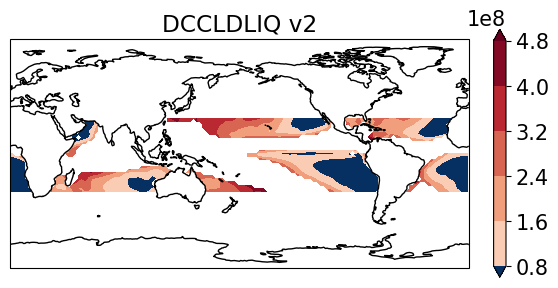

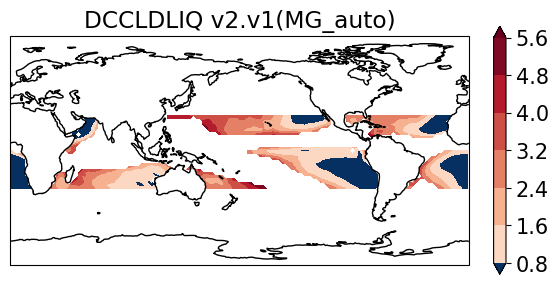

In [21]:
focus_region = 'TropMarineLow' # MarineLow, MidLat

# defined regions 
latS = -30
latE = -10
lonS = 250 #240
lonE = 280 

latS = -30
latE = -10
lonS = 70
lonE = 110

do_spc_region = True

case_stamp = [
    'v2.OutTend',
    # 'v2.bk.MG',
    # 'v2.bk.MG_Berg',
    # 'v2.bk.MG_mincdnc',
    # 'v2.bk.MG_accre',
    'v2.bk.MG_auto',
    # 'v2.bk.MG_wsub',   
    ]

case_stamp_out = [
    'v2',
    # 'v2.v1(MG)',
    # 'v2.v1(MG_Berg)',
    # 'v2.v1(MG_mincdnc)',
    # 'v2.v1(MG_accre)',
    'v2.v1(MG_auto)',
    # 'v2.v1(MG_wsub)',
    ]

# add the sum term to verify the conservation 
add_sumterm = False

# plot_vars = ['T','Q','CLDLIQ']
# plot_vars = ['T','Q','CLDLIQ','MP_only','Prec_only']
# plot_vars = ['Prec_only']
plot_vars = ['CLDLIQ','MP_only','Prec_only']

print('focus_region=',focus_region)

dics = {}
for iplot,plot_var in enumerate(plot_vars):
    
    if plot_var == 'T':
        Vars = ['DTCOND','ZMDT','MPDT','TTEND_CLUBB','QRL','QRS']
    elif plot_var == 'CLDLIQ':
        Vars = ['DCCLDLIQ','ZMDLIQ','DPDLFLIQ','MPDLIQ','RCMTEND_CLUBB']
    elif plot_var == 'Q':
        # PTEQ == DCQ
        Vars = ['DCQ','ZMDQ','MPDQ','RVMTEND_CLUBB']
    elif plot_var == 'MP_only': # no 'MPDW2P'
        Vars = ['MPDLIQ','MPDW2P','MPDW2I','MPDW2V','QCSEDTEN']
    elif plot_var == 'Prec_only':
        Vars = ['MPDW2P','PRAO','PRCO','PSACWSO','BERGSO']
    elif plot_var == 'PCLOUD':
        Vars = ['CLOUD']
    elif plot_var == 'PCLDLIQ':
        Vars = ['CLDLIQ'] 
            
    dics[plot_var] = {}
    for ivar,svar in enumerate(Vars):
        print(svar)
        
        dics[plot_var][svar] = {} 
        for icase,case in enumerate(case_stamp):
            
            f1 = xr.open_dataset(datadir+'global_'+svar+'_'+case+'.nc')
            print(datadir+'global_'+svar+'_'+case+'.nc')
            data1 = f1[svar+'_pi_clim']
            data2 = f1[svar+'_ab_clim']
            data3 = f1[svar+'_ano_clim']
            f1.close()
            
            svarh = 'PRECT'
            f1 = xr.open_dataset(datadir+'global_'+svarh+'_'+case+'.nc')
            print(datadir+'global_'+svarh+'_'+case+'.nc')
            data1a = f1[svarh+'_pi_clim']*8.64e7
            data2a = f1[svarh+'_ab_clim']*8.64e7
            data3a = f1[svarh+'_ano_clim']*8.64e7
            f1.close()
            
            # svarh = 'CLDLIQ'
            # f1 = xr.open_dataset(datadir+'global_'+svarh+'_'+case+'.nc')
            # print(datadir+'global_'+svarh+'_'+case+'.nc')
            # data1a = f1[svarh+'_pi_clim']*1e3
            # data2a = f1[svarh+'_ab_clim']*1e3
            # data3a = f1[svarh+'_ano_clim']*1e3
            # f1.close()
           
            if plot_var == 'T':
                scale = 86400.  # convert from K/s to K/day  
            elif plot_var in ['Q','CLDLIQ','MP_only','Prec_only']:
                scale = 86400.*1e3   # convert from kg/kg/s to g/kg/day
            else:
                print('svar scale',svar)
                scale = 1.0 

            if svar == 'MPDT':
                scale2 = 1.0/cpair # kg/kg --> g/kg
            elif svar in ['PRAO','PRCO','PSACWSO','BERGSO']:
                print('===== changing scale')
                scale2 = -1.0 
            else:
                scale2 = 1.0
        
            data1_cs = data1*scale*scale2
            data2_cs = data2*scale*scale2
            data3_cs = data3*scale*scale2 
            
            dics[plot_var][svar][case] = []
            
            ii = 0 
            for data,dataa in zip([data1_cs,data2_cs],[data1a,data2a]):
            
                # ensure the lat and lon names 
                latnew, lonnew = list(data.coords.keys())[0], list(data.coords.keys())[1]
                data = data.rename({lonnew: 'lon',latnew: 'lat'})

                _,_,data_avg,_,_,_,_ \
                    = v1v2.regime_partitioning(focus_region,omega700_pi_mm,omega700_ab_mm,omega700_avg_mm,data) 
                
                _,_,dataa_avg,_,_,_,_ \
                    = v1v2.regime_partitioning(focus_region,omega700_pi_mm,omega700_ab_mm,omega700_avg_mm,dataa) 

                print('focus_region=',focus_region)
                # ======== check spatial map ========================
                if ivar == 0 and iplot == 0 and len(dataa_avg.shape) == 2 and ii == 0: 
                    fig = plt.figure()
                    ax = fig.add_subplot(1,1,1,projection=ccrs.PlateCarree(180))
                    im = ax.contourf(data_avg.lon,data_avg.lat,dataa_avg,transform=ccrs.PlateCarree(),
                                     # levels=levels,
                                     norm=mcolors.CenteredNorm(), 
                                     cmap='RdBu_r',
                                     extend='both'
                                )
                    ax.coastlines()
                    ax.set_global()  
                    ax.set_title(svar+' '+case_stamp_out[icase])

                    fig.colorbar(im,ax=ax,fraction=0.025)
                # ================================================================    

                if focus_region == 'MidLat':
                    top_lev = 200
                else:
                    top_lev = 700 
        
                if focus_region == 'MarineLow' and do_spc_region:
                    print('do_spc_region',do_spc_region)
                    dics[plot_var][svar][case].append(v1v2.area_averager(data_avg.sel(lat=slice(latS,latE),lon=slice(lonS,lonE),lev=slice(1000,top_lev))))
                else:
                    dics[plot_var][svar][case].append(v1v2.area_averager(data_avg.sel(lev=slice(1000,top_lev))))
                    # dics[plot_var][svar][case].append(area_averager(data_avg.sel(lev=slice(1000,top_lev)))/area_averager(dataa_avg)) # for precipitation
                    
                    # tmpp = dataa_avg.sel(lev=slice(1000,top_lev))
                    # tmpp2 = area_averager(wgt_p_LevLatLon(tmpp,tmpp.lev)).values
                    # # dics[plot_var][svar][case].append(area_averager(data_avg.sel(lev=slice(1000,top_lev)))/tmpp2)
                    # print('tmpp2=',tmpp2)

                    if ii == 0:
                        tmp = v1v2.area_averager(dataa_avg).values
                    else:
                        tmp = v1v2.area_averager(dataa_avg).values - tmp 
                    if len(dataa_avg.shape) == 2:
                        print('area_averager(dataa_avg)=',v1v2.area_averager(dataa_avg).values, tmp)
                    
                ii += 1
        
    print(dics[plot_var].keys())
    
    # ====== calculate DYN term =======================
    if plot_var in ['T','Q']:
        dics[plot_var]['DYN'] = {}
        for exp in dics[plot_var][Vars[0]].keys():
            if plot_var == 'Q':
                dics[plot_var]['DYN'][exp] = [] 
                for ii in range(2):
                    dics[plot_var]['DYN'][exp].append(-1. * (dics[plot_var]['DCQ'][exp][ii]))
            if plot_var == 'T':
                dics[plot_var]['DYN'][exp] = [] 
                for ii in range(2):
                    dics[plot_var]['DYN'][exp].append(-1. * (dics[plot_var]['DTCOND'][exp][ii]+dics[plot_var]['QRL'][exp][ii]+dics[plot_var]['QRS'][exp][ii]))

    

## Figure 9 - bar plot of cloud water tendency

In [28]:
# Take negative and positive data apart and cumulate
def get_cumulated_array(data, **kwargs):
    cum = data.clip(**kwargs)
    cum = np.cumsum(cum, axis=0)
    d = np.zeros(np.shape(data))
    d[1:] = cum[:-1]

    return d  

def cumulated_bar(datap_bar): 
    datap_shape = datap_bar.shape

    cumulated_data = get_cumulated_array(datap_bar, min=0)
    cumulated_data_neg = get_cumulated_array(datap_bar, max=0)

    # Re-merge negative and positive data.
    row_mask = (datap_bar<0)
    cumulated_data[row_mask] = cumulated_data_neg[row_mask]
    data_stack = cumulated_data

    return data_stack 

def get_ec_hatch(iplot,i):
    if iplot == 0:
        if i == 2: 
            ec = 'black'
            hatch = '/'
        else:
            ec = 'black'
            hatch = None
    elif iplot == 1:
        if i == 0:
            ec = 'black'
            hatch = '/.'
        else:
            ec = 'black'
            hatch = '/'
    else:
        ec = 'black'
        hatch = '/.'

    return ec,hatch
               

plot_var= CLDLIQ
plot_var = CLDLIQ exclude_svar = ['ZMDLIQ']
Vars_out =  ['TotPhy', 'ZMDetrain', 'MP', 'CLUBB']
['ZMDetrain', 'MP', 'CLUBB']
plot_var= MP_only
plot_var = MP_only exclude_svar = ['MPDW2I', 'MPDW2V']
Vars_out =  ['MP', 'Liquid->Precip', 'Sedimentation']
['Liquid->Precip', 'Sedimentation']
plot_var= Prec_only
plot_var = Prec_only exclude_svar = ['PSACWSO', 'BERGSO']
Vars_out =  ['Liquid->Precip', 'Accretion by rain', 'Autoconversion']
['Accretion by rain', 'Autoconversion']


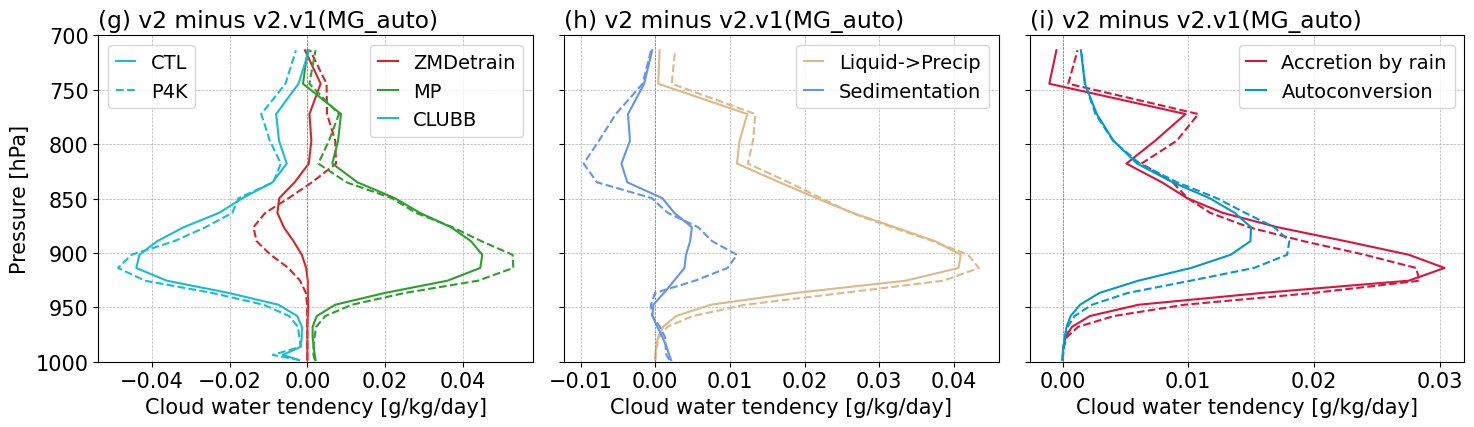

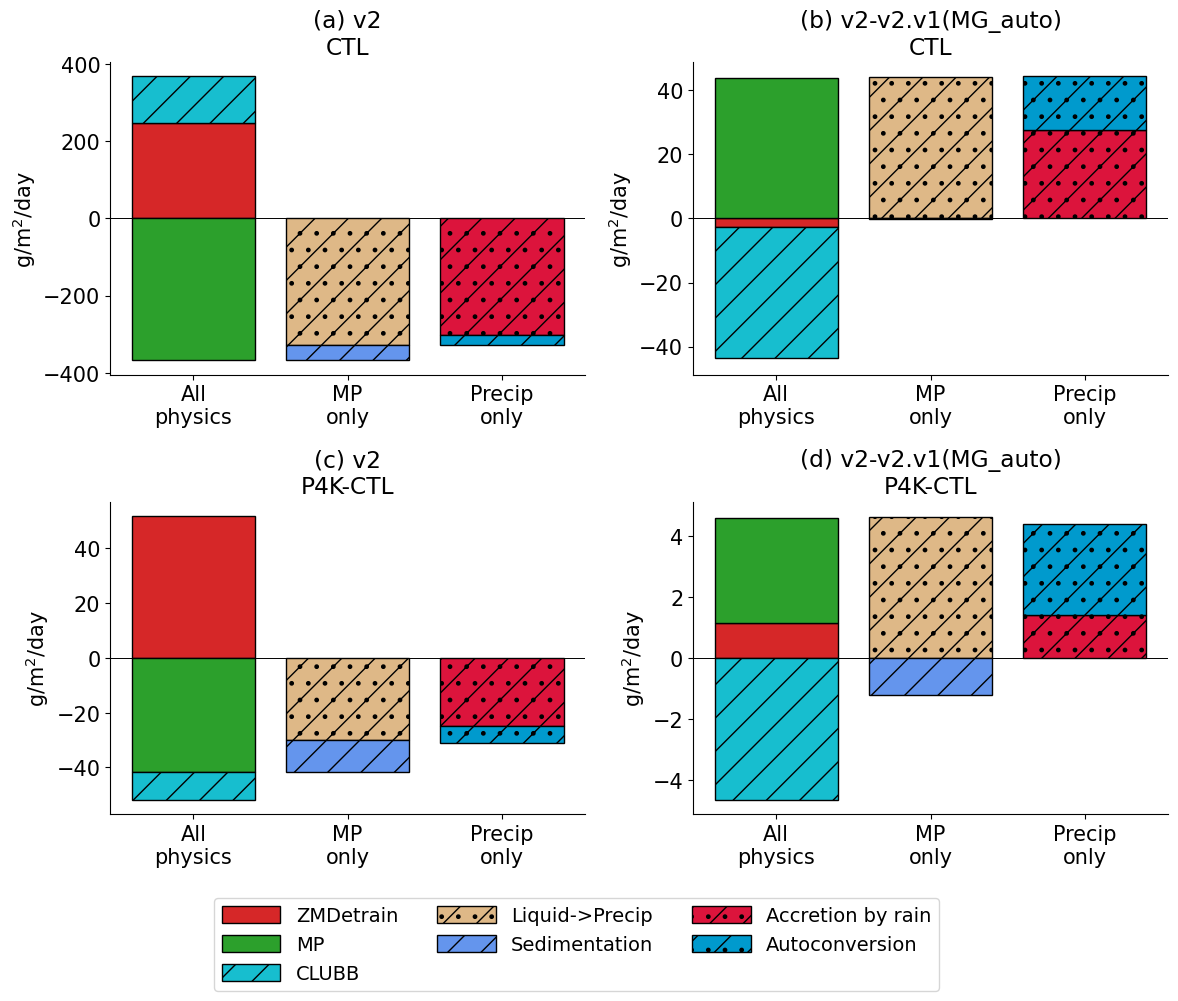

In [29]:
# profile plot
# -------------------------------------------
nrow = len(case_stamp)-1
ncol = len(plot_vars)
fig = plt.figure(figsize=(ncol*5,9/2*nrow))
outfile = 'Profiles_Tendency_'+case_stamp_out[0]+'_minus_'+case_stamp_out[1]+'_'+plot_vars[-1]+'_'+focus_region+'_'+tag3+'_'+dd+'.png'

# bar plot
# -------------------------------------------
nrowb = 2
ncolb = len(case_stamp) 
figbar,((axbar1, axbar2), (axbar4, axbar5)) = plt.subplots(nrowb,ncolb,figsize=(12,9))

# figbar,((axbar1, axbar2, axbar3), (axbar4, axbar5, axbar6)) = plt.subplots(nrowb,ncolb,figsize=(12,9))

outstr = '_'.join(case_stamp_out)
outfile_bar = 'Barplot_IntegratedTendency_'+outstr+'_'+plot_vars[-1]+'_'+focus_region+'_'+tag3+'_'+dd

# loop plot_var 
# --------------------------------------------
for iplot,plot_var in enumerate(dics.keys()):
    print('plot_var=',plot_var)

    # get output name and color lists 
    if focus_region == 'TropMarineLow':
        if plot_var == 'CLDLIQ':
            exclude_svar = ['ZMDLIQ']
        elif plot_var == 'MP_only':
            exclude_svar = ['MPDW2I','MPDW2V']
        elif plot_var == 'Prec_only':
            exclude_svar = ['PSACWSO','BERGSO']
            # exclude_svar = ['BERGSO']
        else:
            exclude_svar = [] 
    else:
        exclude_svar = []
    
    print('plot_var =', plot_var, 'exclude_svar =',exclude_svar)
    
    Vars = [svar for svar in dics[plot_var].keys() if svar not in exclude_svar]
    Vars_out = [dic_att[svar]['name'] for svar in dics[plot_var].keys() if svar not in exclude_svar]
    colorsA = [dic_att[svar]['color'] for svar in dics[plot_var].keys() if svar not in exclude_svar]
    print('Vars_out = ', Vars_out)

    levs = data1_cs.coords['lev'].data
    marker = '.'
    
    # define axes for profile plots 
    # -----------------------------------------------------------
    axes = [] 
    ax1 = fig.add_subplot(nrow,ncol,iplot+1)
    axes.append(ax1)
    if nrow == 2: 
        ax2 = fig.add_subplot(nrow,ncol,iplot+ncol+1)
        axes.append(ax2)

    if plot_var in ['T','Q']:
        ivar = 1    
    elif plot_var in ['CLDLIQ']:
        ivar = 1
    elif plot_var in ['MP_only','Prec_only']:
        ivar = 1
    else:
        ivar = 0 

    varlist = Vars[ivar:]
    varlist_out = Vars_out[ivar:]
    colors_h = colorsA[ivar:] 
    
    data_v2_CTL = []
    label_v2_CTL = [] 
    data_v2_v2x1_CTL = [] 
    if nrow == 2:
        data_v2_v2x2_CTL = []
    data_v2_P4K_CTL = []
    data_v2_v2x1_P4K_CTL = []
    if nrow == 2:
        data_v2_v2x2_P4K_CTL = [] 
    for ivar,svar in enumerate(varlist):
        label = varlist_out[ivar] 
            
        levs = dics[plot_var][svar][case_stamp[0]][0].lev.data
        # CTL 
        datap = dics[plot_var][svar][case_stamp[0]][0] - dics[plot_var][svar][case_stamp[1]][0]
        L1 = ax1.plot(datap,levs,ls='-',color=colors_h[ivar],label=label)
        
        if nrow == 2:
            datap = dics[plot_var][svar][case_stamp[0]][0] - dics[plot_var][svar][case_stamp[2]][0]
            ax2.plot(datap,levs,ls='-',color=colors_h[ivar],label=label)

        # collect vertically-integrated data for CTL
        # -------------------------------------------------------------------------
        data_v2_CTL.append(v1v2.wgt_p_1d(dics[plot_var][svar][case_stamp[0]][0],levs)) 
        label_v2_CTL.append(varlist_out[ivar])    
        
        data_v2_v2x1_CTL.append(v1v2.wgt_p_1d(dics[plot_var][svar][case_stamp[0]][0],levs)-v1v2.wgt_p_1d(dics[plot_var][svar][case_stamp[1]][0],levs))
        if nrow == 2:
            data_v2_v2x2_CTL.append(v1v2.wgt_p_1d(dics[plot_var][svar][case_stamp[0]][0],levs)-v1v2.wgt_p_1d(dics[plot_var][svar][case_stamp[2]][0],levs))
        
        # P4K 
        datap = dics[plot_var][svar][case_stamp[0]][1] - dics[plot_var][svar][case_stamp[1]][1]
        L2 = ax1.plot(datap,levs,ls='--',color=colors_h[ivar],label='_nolegend_')
        
        if nrow == 2:
            datap = dics[plot_var][svar][case_stamp[0]][1] - dics[plot_var][svar][case_stamp[2]][1]
            ax2.plot(datap,levs,ls='--',color=colors_h[ivar],label='_nolegend_')
         
        # collect vertically-integrated data for P4K
        # -------------------------------------------------------------------------
        data_v2_P4K_CTL.append(v1v2.wgt_p_1d(dics[plot_var][svar][case_stamp[0]][1],levs)-v1v2.wgt_p_1d(dics[plot_var][svar][case_stamp[0]][0],levs)) 
        data_v2_v2x1_P4K_CTL.append((v1v2.wgt_p_1d(dics[plot_var][svar][case_stamp[0]][1],levs)-v1v2.wgt_p_1d(dics[plot_var][svar][case_stamp[0]][0],levs))\
                                   -(v1v2.wgt_p_1d(dics[plot_var][svar][case_stamp[1]][1],levs)-v1v2.wgt_p_1d(dics[plot_var][svar][case_stamp[1]][0],levs)))
        
        if nrow == 2:
            data_v2_v2x2_P4K_CTL.append((v1v2.wgt_p_1d(dics[plot_var][svar][case_stamp[0]][1],levs)-v1v2.wgt_p_1d(dics[plot_var][svar][case_stamp[0]][0],levs))\
                                       -(v1v2.wgt_p_1d(dics[plot_var][svar][case_stamp[2]][1],levs)-v1v2.wgt_p_1d(dics[plot_var][svar][case_stamp[2]][0],levs)))
 
    
    print(label_v2_CTL)
    
    # plot vertically-integrated bar plot 
    # ----------------------------------------------------------------------
    datapA = [np.array([data_v2_CTL]).transpose(),
              np.array([data_v2_v2x1_CTL]).transpose(),
              # np.array([data_v2_v2x2_CTL]).transpose(),
              np.array([data_v2_P4K_CTL]).transpose(),
              np.array([data_v2_v2x1_P4K_CTL]).transpose(),
              # np.array([data_v2_v2x2_P4K_CTL]).transpose(),
             ]
    
    titleA = ['(a) '+case_stamp_out[0]+'\nCTL',
              '(b) '+case_stamp_out[0]+'-'+case_stamp_out[1]+'\nCTL',
              # '(c) '+case_stamp_out[0]+'-'+case_stamp_out[2]+'\nCTL',
              '(c) '+case_stamp_out[0]+'\nP4K-CTL',
              '(d) '+case_stamp_out[0]+'-'+case_stamp_out[1]+'\nP4K-CTL',
              # '(f) '+case_stamp_out[0]+'-'+case_stamp_out[2]+'\nP4K-CTL',
    ]
    
    axbars = [axbar1,axbar2,
              # axbar3,
              axbar4,axbar5,
              # axbar6,
             ]
              
    
    ibar = 0 
    for datap_bar,title,axbar in zip(datapA,titleA,axbars):
        if ibar == 2:
            label = label_v2_CTL
        else:
            label = ['_nolegend_']*len(label_v2_CTL)
        
        data_stack = cumulated_bar(datap_bar) 
        for i in np.arange(0, datap_bar.shape[0]):
            ec,hatch = get_ec_hatch(iplot,i)
            axbar.bar(np.arange(datap_bar.shape[1])+iplot*0.25, datap_bar[i], bottom=data_stack[i],width=0.2,color=colors_h[i],ec=ec,
                       hatch=hatch,
                      label=label[i],
                       )
        axbar.set_title(title)
        axbar.axhline(y=0,ls='-',c='black',lw=0.5)
        
        if iplot == len(dics.keys())-1:
            ymin,ymax = axbar.get_ylim()
            ylim = max([abs(ymin),abs(ymax)])
            axbar.set_ylim((-ylim,ylim))
        
        axbar.spines[['right', 'top']].set_visible(False)

        axbar.set_xticks([0,0.25,0.5])
        axbar.set_xticklabels(['All\nphysics','MP\nonly','Precip\nonly'])
        axbar.set_ylabel('g/m$^2$/day')
        
        if iplot == 2 and label[0] != '_nolegend_':
            # axbar.legend(bbox_to_anchor=(1.04,0), loc='lower left')
            figbar.legend(bbox_to_anchor=(0.0,-0.1,0.8,0.1),ncol=3,handlelength=3,handleheight=1)
        
        ibar += 1
    
    # set attributes for profile plot
    # ----------------------------------------------------------------------
    for ax in axes:
        if iplot == 0: 
            legend1 = ax.legend([L1[0],L2[0]],['CTL','P4K'],loc='upper left')
            ax.legend(loc='upper right')
            ax.add_artist(legend1)
        else:
            ax.legend(loc='upper right')
    
    if 'auto' in case_stamp_out[1]:
        offset = 7
    elif 'mincdnc' in case_stamp_out[1]:
        offset = 4 
    else:
        offset = 1
        
    ax1.set_title('('+chr(ord('`')+(iplot+offset))+') '+case_stamp_out[0]+' minus '+case_stamp_out[1], loc='left')
    if nrow == 2:
        ax2.set_title('('+chr(ord('`')+(iplot+ncol+offset))+') '+case_stamp_out[0]+' minus '+case_stamp_out[2], loc='left')
      
    if iplot == 0:
        ax1.set_ylabel('Pressure [hPa]')
        # ax2.set_ylabel('Pressure [hPa]')
    else:
        ax1.set_yticklabels([])
        # ax2.set_yticklabels([])

    for axx in axes:
        axx.set_ylim((1000,top_lev))

        if plot_var == 'T':
            axx.set_xlabel('T tendency [K/day]')
            axx.set_xlim((-10,10))
        elif plot_var in ['CLDLIQ','MP_only','Prec_only']:
            axx.set_xlabel('Cloud water tendency [g/kg/day]')
            # if focus_region == 'MidLat' and top_lev == 200:
            #     axx.set_xlim((-0.08,0.08))
            # else:
            #     axx.set_xlim((-0.05,0.05))
        elif plot_var == 'Q':
            axx.set_xlabel('Water vapor tendency [g/kg/day]')
            #axx.set_xlim((-3,4))
            #if axx in [ax4]:
            #    axx.set_xlim((-1.8,1.8))
            axx.set_xlim((-3,4.5))

        axx.axvline(x=0,ls='--',color='grey',lw=0.5)
              
        axx.grid(axis='both',ls='--',lw=0.5)

fig.tight_layout()
fig.savefig(figdir+outfile,dpi = 300, bbox_inches='tight')

figbar.tight_layout()
figbar.savefig(figdir+outfile_bar+'.png', dpi=300, bbox_inches='tight')
figbar.savefig(figdir+outfile_bar+'.pdf',bbox_inches='tight') 


## plot T, Q, and CLDLIQ tendencies [not used]

plot_var= CLDLIQ
svar= ZMDLIQ label= ZM dict_keys(['v2.OutTend', 'v2.bk.MG_auto'])
svar= DPDLFLIQ label= ZMDetrain dict_keys(['v2.OutTend', 'v2.bk.MG_auto'])
svar= MPDLIQ label= MP dict_keys(['v2.OutTend', 'v2.bk.MG_auto'])
svar= RCMTEND_CLUBB label= CLUBB dict_keys(['v2.OutTend', 'v2.bk.MG_auto'])
svar= ZMDLIQ label= ZM dict_keys(['v2.OutTend', 'v2.bk.MG_auto'])
svar= DPDLFLIQ label= ZMDetrain dict_keys(['v2.OutTend', 'v2.bk.MG_auto'])
svar= MPDLIQ label= MP dict_keys(['v2.OutTend', 'v2.bk.MG_auto'])
svar= RCMTEND_CLUBB label= CLUBB dict_keys(['v2.OutTend', 'v2.bk.MG_auto'])
plot_var= MP_only
svar= MPDW2P label= Liquid->Precip dict_keys(['v2.OutTend', 'v2.bk.MG_auto'])
svar= MPDW2I label= Liquid->Ice dict_keys(['v2.OutTend', 'v2.bk.MG_auto'])
svar= MPDW2V label= Liquid->Vapor dict_keys(['v2.OutTend', 'v2.bk.MG_auto'])
svar= QCSEDTEN label= Sedimentation dict_keys(['v2.OutTend', 'v2.bk.MG_auto'])
svar= MPDW2P label= Liquid->Precip dict_keys(['v2.OutTend', 'v2.bk.MG_auto'])
svar= MPDW2I

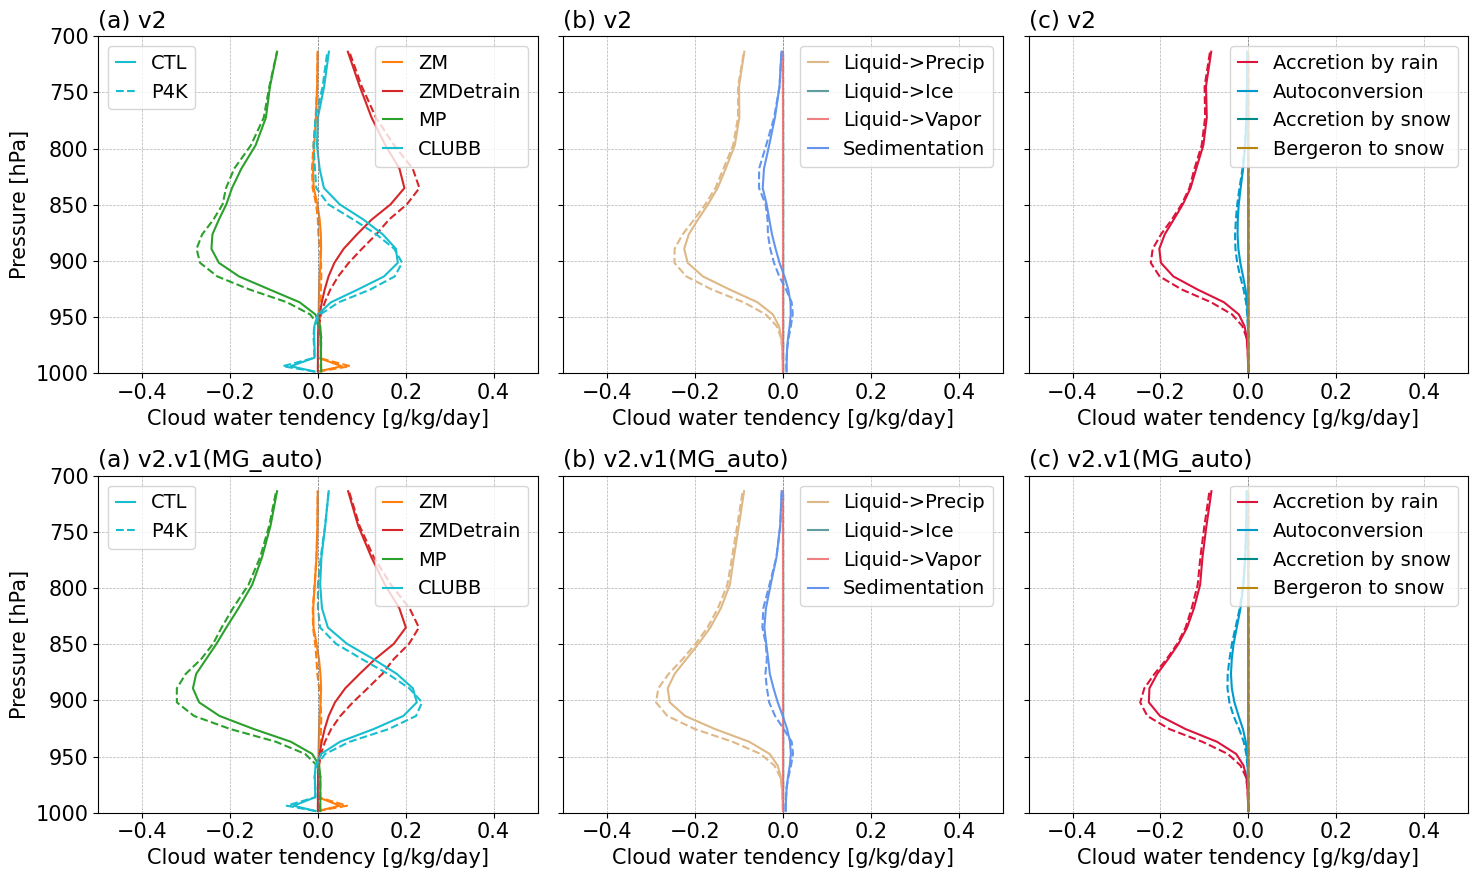

In [30]:
#==================
nrow = len(case_stamp)
ncol = len(plot_vars)

fig = plt.figure(figsize=(ncol*5,9/2*nrow))

outfile = 'Profiles_Tendency_'+case_stamp_out[-1]+'_'+plot_vars[-1]+'_'+focus_region+'_'+tag+'_'+tag3+'_'+dd+'.png'

for iplot,plot_var in enumerate(dics.keys()):
    print('plot_var=',plot_var)

    # get output name and color lists 
    Vars_out = [dic_att[svar]['name'] for svar in dics[plot_var].keys()]
    colorsh = [dic_att[svar]['color'] for svar in dics[plot_var].keys()]
        
    if plot_var in ['T','Q']:
        ivar = 1
    elif plot_var in ['CLDLIQ']:
        ivar = 1
    elif plot_var in ['MP_only','Prec_only']:
        ivar = 1
    else:
        ivar = 0 
            
    varlist = list(dics[plot_var].keys())[ivar:]
    varlist_out = Vars_out[ivar:]
    colors_h = colorsh[ivar:] 
        
    for icase,case in enumerate(dics[plot_var][varlist[0]].keys()):
        marker = '.'

        # =============================================
        ax1 = fig.add_subplot(nrow,ncol,icase*ncol+iplot+1)


        for ivar,svar in enumerate(varlist):
            
            label = varlist_out[ivar] 
            print('svar=',svar,'label=',label,dics[plot_var][svar].keys())

            levs = dics[plot_var][svar][case][0].coords['lev'].data
            
            L1 = ax1.plot(np.array(dics[plot_var][svar][case][0]),levs,ls='-',color=colors_h[ivar],label=label)

            L2 = ax1.plot(np.array(dics[plot_var][svar][case][1]),levs,ls='--',color=colors_h[ivar],label='_nolegend_')

        if iplot == 0: 
            legend = plt.legend([L1[0],L2[0]],['CTL','P4K'],loc='upper left')
            ax1.legend(loc='upper right')
            ax1.add_artist(legend)
        else:
            ax1.legend()

        ax1.set_title('('+chr(ord('`')+(iplot+1))+') '+case_stamp_out[icase], loc='left')


        # ========================== 
        if (iplot+1)%ncol == 1: # the first column subplots 
            ax1.set_ylabel('Pressure [hPa]')
        else:
            ax1.set_yticklabels([])

        ax1.set_ylim((1000,top_lev))

        if plot_var == 'T':
            ax1.set_xlabel('T tendency [K/day]')
            ax1.set_xlim((-10,10))
        elif plot_var in ['CLDLIQ','MP_only','Prec_only']:
            ax1.set_xlabel('Cloud water tendency [g/kg/day]')
            # ax1.set_xlim((-1.2,0.7))
            ax1.set_xlim((-0.5,0.5))
        elif plot_var == 'Q':
            ax1.set_xlabel('Water vapor tendency [g/kg/day]')
            ax1.set_xlim((-4.5,4.5))

        ax1.axvline(x=0,ls='--',color='grey',lw=0.5)
        # ax1.axhline(y=850,ls='--',color='grey',lw=0.5)
        
        ax1.grid(axis='both',ls='--',lw=0.5)
        
fig.tight_layout()

# fig.savefig(figdir+outfile,dpi = 300, bbox_inches='tight')


## plot only P4K-CTL [not used]

plot_var= CLDLIQ dict_keys(['CLDLIQ', 'MP_only', 'Prec_only'])
ZMDLIQ dict_keys(['v2.OutTend', 'v2.bk.MG_auto'])
DPDLFLIQ dict_keys(['v2.OutTend', 'v2.bk.MG_auto'])
MPDLIQ dict_keys(['v2.OutTend', 'v2.bk.MG_auto'])
RCMTEND_CLUBB dict_keys(['v2.OutTend', 'v2.bk.MG_auto'])
ZMDLIQ dict_keys(['v2.OutTend', 'v2.bk.MG_auto'])
DPDLFLIQ dict_keys(['v2.OutTend', 'v2.bk.MG_auto'])
MPDLIQ dict_keys(['v2.OutTend', 'v2.bk.MG_auto'])
RCMTEND_CLUBB dict_keys(['v2.OutTend', 'v2.bk.MG_auto'])
plot_var= MP_only dict_keys(['CLDLIQ', 'MP_only', 'Prec_only'])
MPDW2P dict_keys(['v2.OutTend', 'v2.bk.MG_auto'])
MPDW2I dict_keys(['v2.OutTend', 'v2.bk.MG_auto'])
MPDW2V dict_keys(['v2.OutTend', 'v2.bk.MG_auto'])
QCSEDTEN dict_keys(['v2.OutTend', 'v2.bk.MG_auto'])
MPDW2P dict_keys(['v2.OutTend', 'v2.bk.MG_auto'])
MPDW2I dict_keys(['v2.OutTend', 'v2.bk.MG_auto'])
MPDW2V dict_keys(['v2.OutTend', 'v2.bk.MG_auto'])
QCSEDTEN dict_keys(['v2.OutTend', 'v2.bk.MG_auto'])
plot_var= Prec_only dict_keys(['CLDLIQ', 'MP_only',

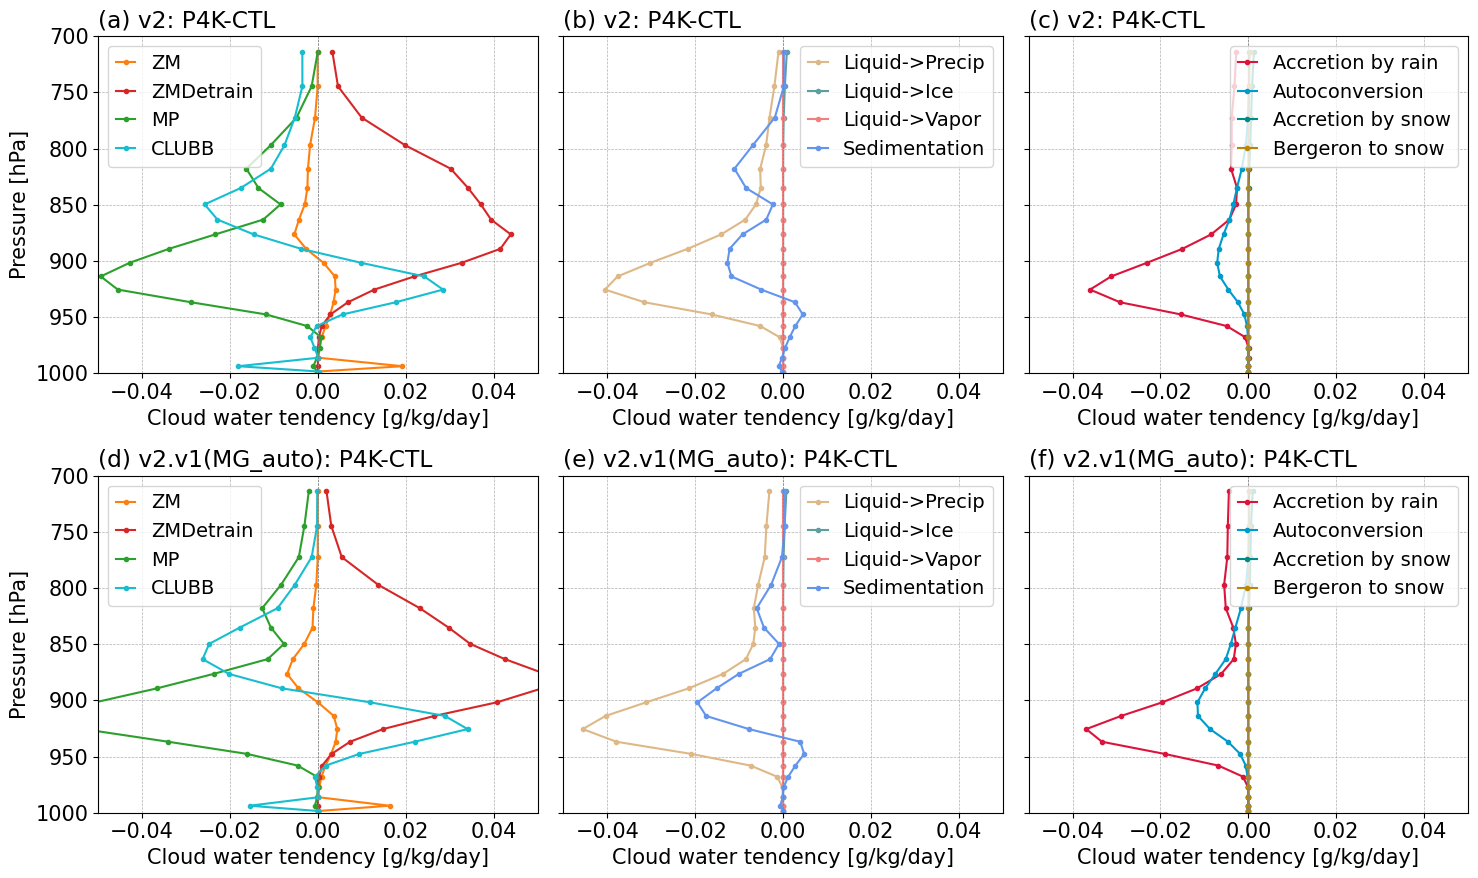

In [23]:

#==================
nrow = len(case_stamp)
ncol = len(plot_vars)

fig = plt.figure(figsize=(ncol*5,9/2*nrow))

outfile = 'Profiles_Tendency_P4K-CTL_'+case_stamp_out[-1]+'_'+plot_vars[-1]+'_'+focus_region+'_'+tag+'_'+tag3+'_'+dd+'.png'

for iplot,plot_var in enumerate(dics.keys()):
    print('plot_var=',plot_var, dics.keys())
    
    # get output name and color lists 
    Vars_out = [dic_att[svar]['name'] for svar in dics[plot_var].keys()]
    colors = [dic_att[svar]['color'] for svar in dics[plot_var].keys()]

    if plot_var in ['T','Q']:
        ivar = 1
    elif plot_var in ['CLDLIQ']:
        ivar = 1
    elif plot_var in ['MP_only','Prec_only']:
        ivar = 1
    else:
        ivar = 0 

    varlist = list(dics[plot_var].keys())[ivar:]
    varlist_out = Vars_out[ivar:]
    colors_h = colors[ivar:] 

        
    levs = data1_cs.coords['lev'].data
    marker = '.'

    for icase,case in enumerate(dics[plot_var][varlist[0]].keys()): 
    
        # ========== plot case1 ===================================
        ax1 = fig.add_subplot(nrow,ncol,icase*ncol+iplot+1)

        for ivar,svar in enumerate(varlist):
            label = varlist_out[ivar] 
            print(svar,dics[plot_var][svar].keys())

            levs = dics[plot_var][svar][case][0].lev.data
            datad = np.array(dics[plot_var][svar][case][1]) - np.array(dics[plot_var][svar][case][0])

            ax1.plot(datad,levs,ls='-',marker='.',color=colors_h[ivar],label=label)

            ax1.legend()

        ax1.set_title('('+chr(ord('`')+(icase*ncol+iplot+1))+') '+case_stamp_out[icase]+': P4K-CTL', loc='left')

        # ========================== 
        if iplot == 0:
            ax1.set_ylabel('Pressure [hPa]')
        else:
            ax1.set_yticklabels([])

        for axx in [ax1]:
            axx.set_ylim((1000,top_lev))

            if plot_var == 'T':
                axx.set_xlabel('T tendency [K/day]')
                # axx.set_xlim((-0.6,0.6))
            elif plot_var in ['CLDLIQ','MP_only','Prec_only']:
                axx.set_xlabel('Cloud water tendency [g/kg/day]')
                axx.set_xlim((-0.05,0.05))
            elif plot_var == 'Q':
                axx.set_xlabel('Water vapor tendency [g/kg/day]')
                # axx.set_xlim((-1,1))
                
            axx.axvline(x=0,ls='--',color='grey',lw=0.5)
            
            axx.grid(axis='both',ls='--',lw=0.5)


fig.tight_layout()

# fig.savefig(figdir+outfile,dpi = 300, bbox_inches='tight')
